# From Previous Class

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [2]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.head()

DATE   Sales
0 2001-01-01  6519.0
1 2001-02-01  6654.0
2 2001-03-01  7332.0
3 2001-04-01  7332.0
4 2001-05-01  8240.0

In [3]:
mobile_sales.DATE.describe()

C:\Users\khush\AppData\Local\Temp\ipykernel_7144\20359885.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  mobile_sales.DATE.describe()


count                     217
unique                    217
top       2001-01-01 00:00:00
freq                        1
first     2001-01-01 00:00:00
last      2019-01-01 00:00:00
Name: DATE, dtype: object

In [4]:
18*12

216

In [5]:
# set the timeperiod as index 
mobile_sales.set_index('DATE', inplace=True)

<Axes: xlabel='DATE'>

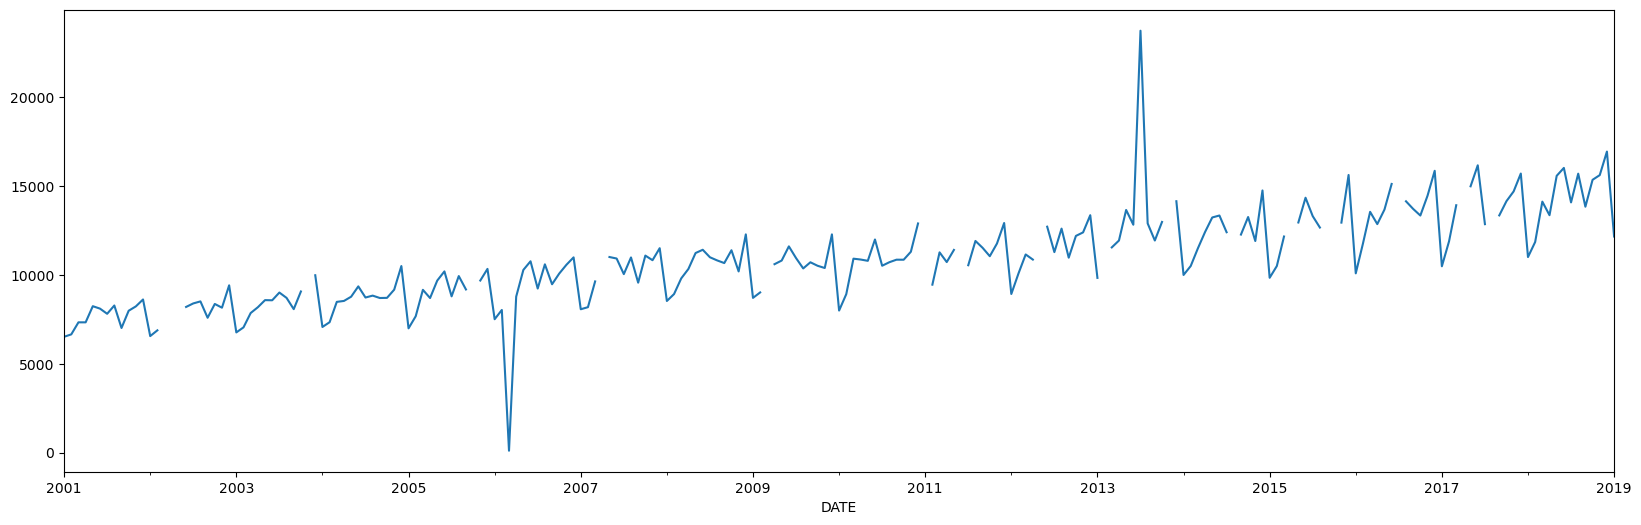

In [6]:
mobile_sales.Sales.plot()

In [7]:
mn = mobile_sales.Sales.mean()

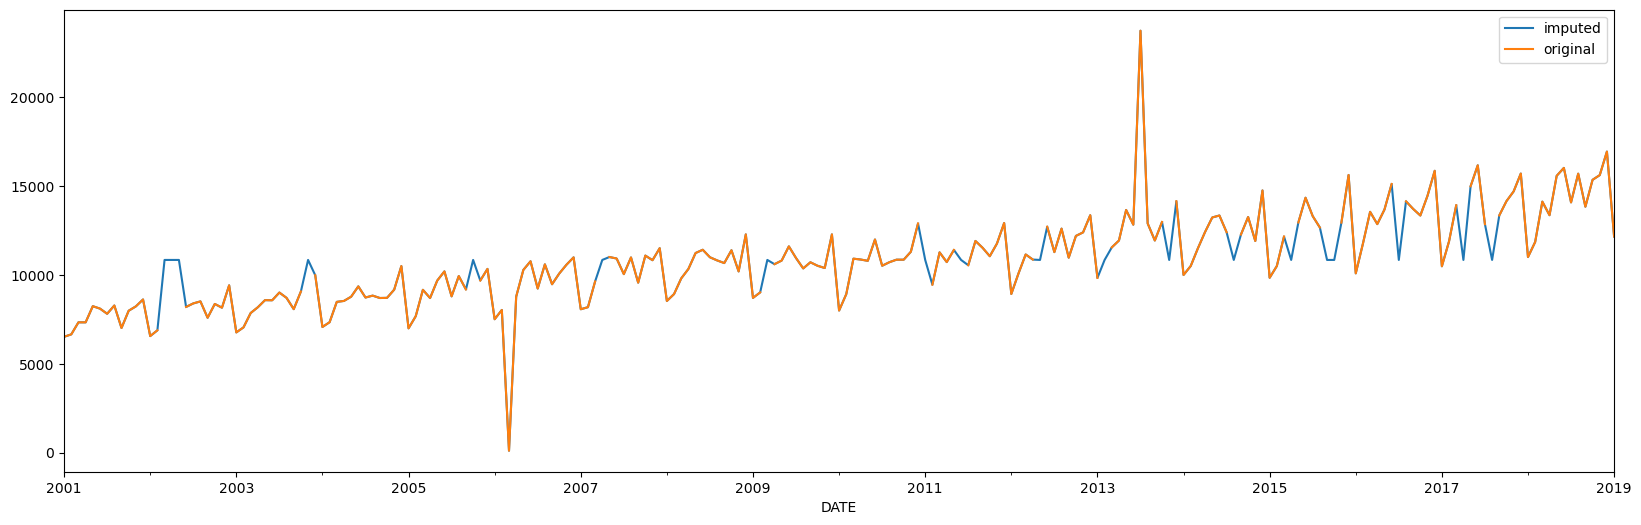

In [8]:
mobile_sales.Sales.fillna(mn).plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

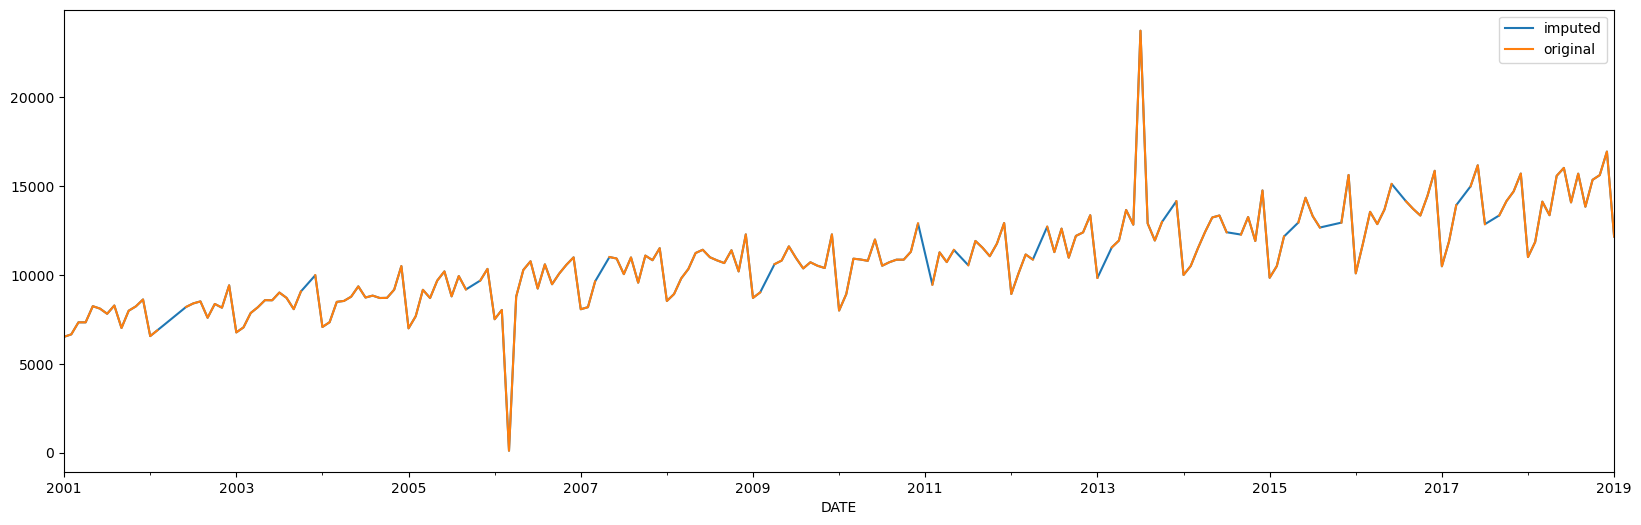

In [9]:
mobile_sales.Sales.interpolate(method='linear').plot(label='imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

[]

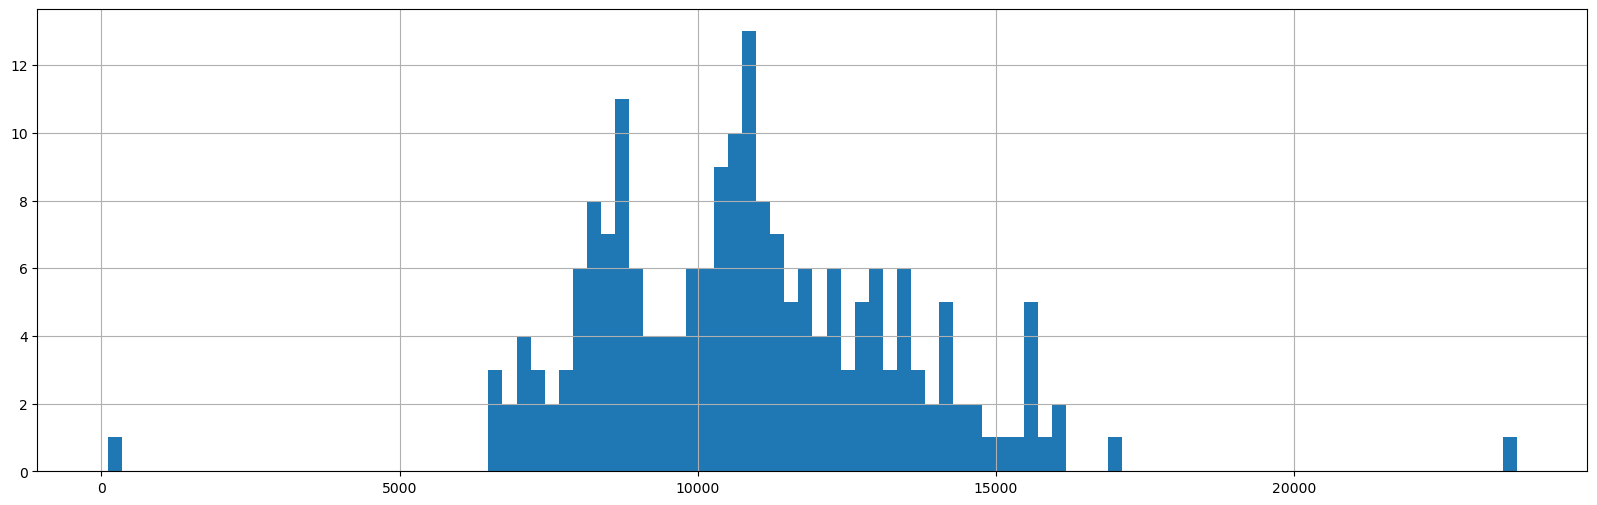

In [10]:
mobile_sales.Sales.hist(bins=100).plot()

In [11]:
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))

<Axes: xlabel='DATE'>

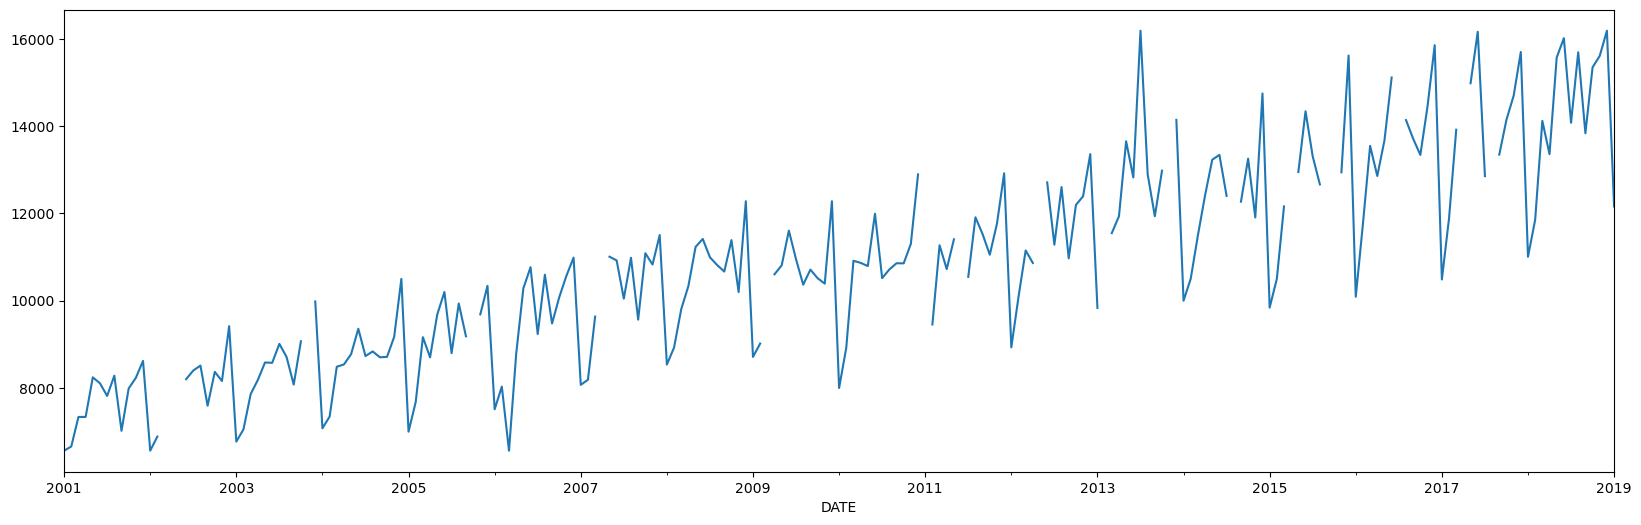

In [12]:
mobile_sales.Sales.plot(label='Clipped')

<Axes: xlabel='DATE'>

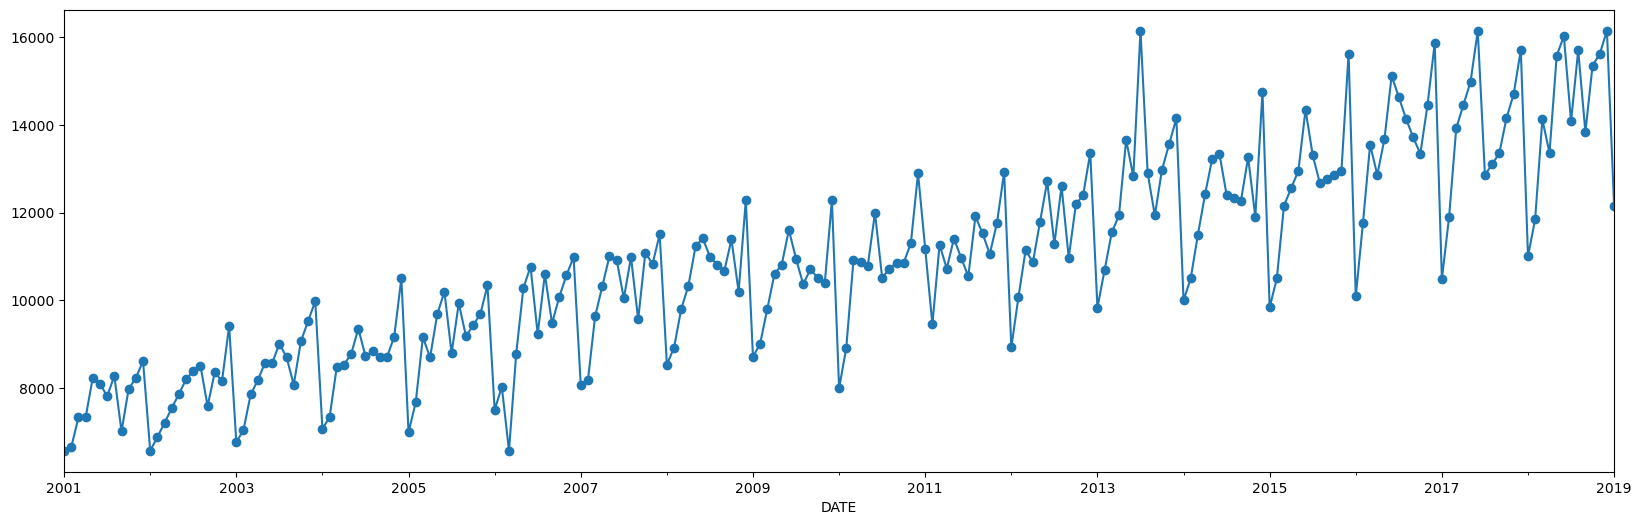

In [13]:
mobile_sales = pd.read_excel('mobilesales.xlsx')
mobile_sales.set_index('DATE', inplace=True)
mobile_sales.Sales = mobile_sales.Sales.interpolate()
mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.99), lower=mobile_sales.Sales.quantile(0.01))
mobile_sales.Sales.plot(style='-o')

<Axes: xlabel='DATE'>

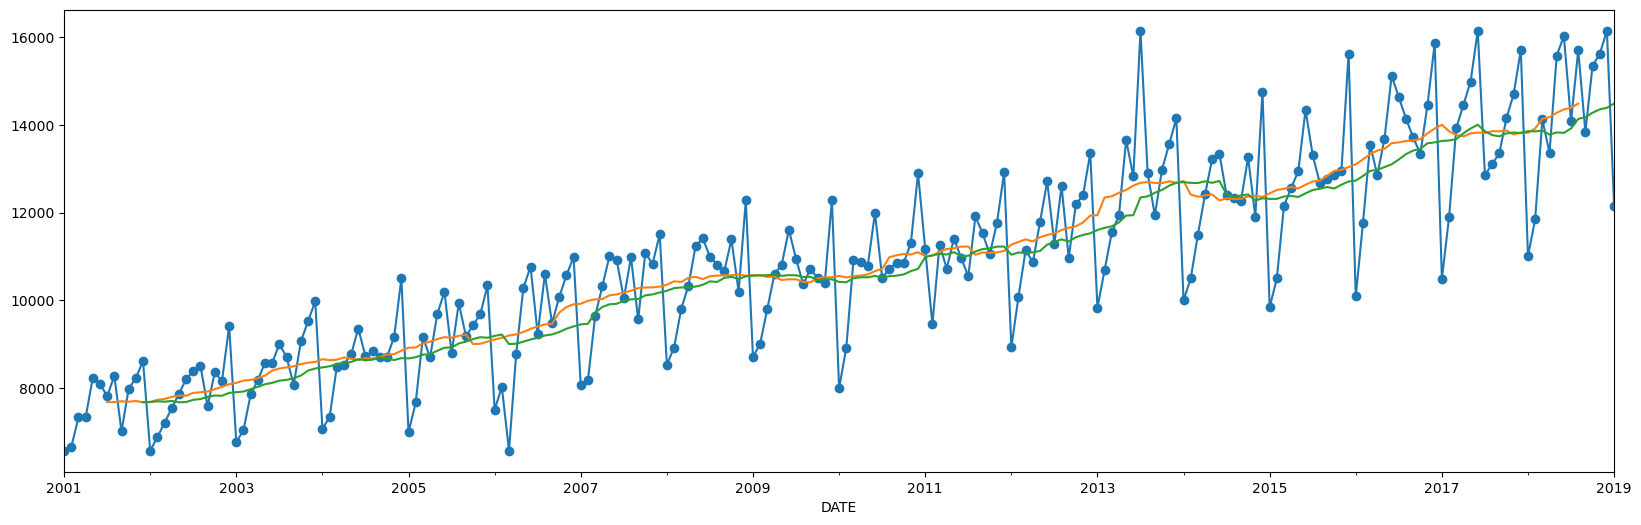

In [14]:
mobile_sales.Sales.plot(style='-o')
mobile_sales.Sales.rolling(12, center=True).mean().plot()
mobile_sales.Sales.rolling(12, center=False).mean().plot()

In [15]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

In [16]:
plt.rcParams['figure.figsize'] = (20, 10)

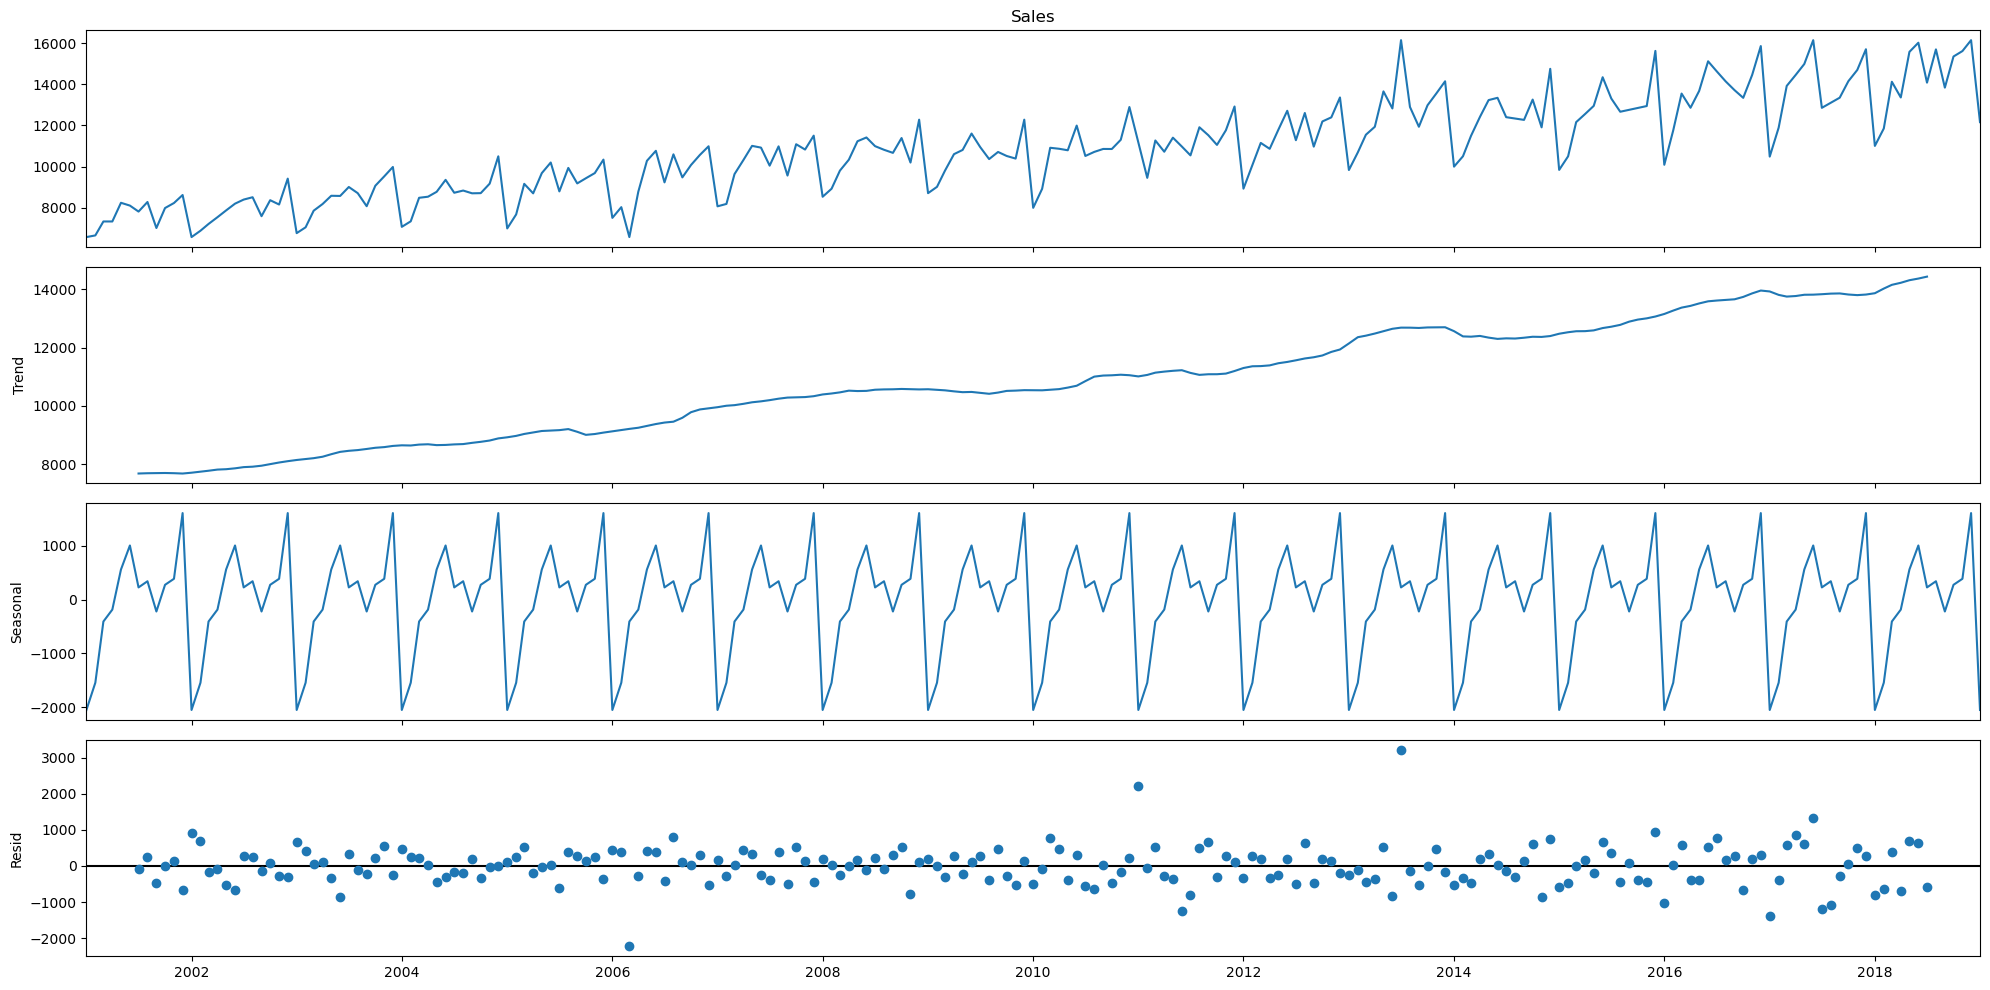

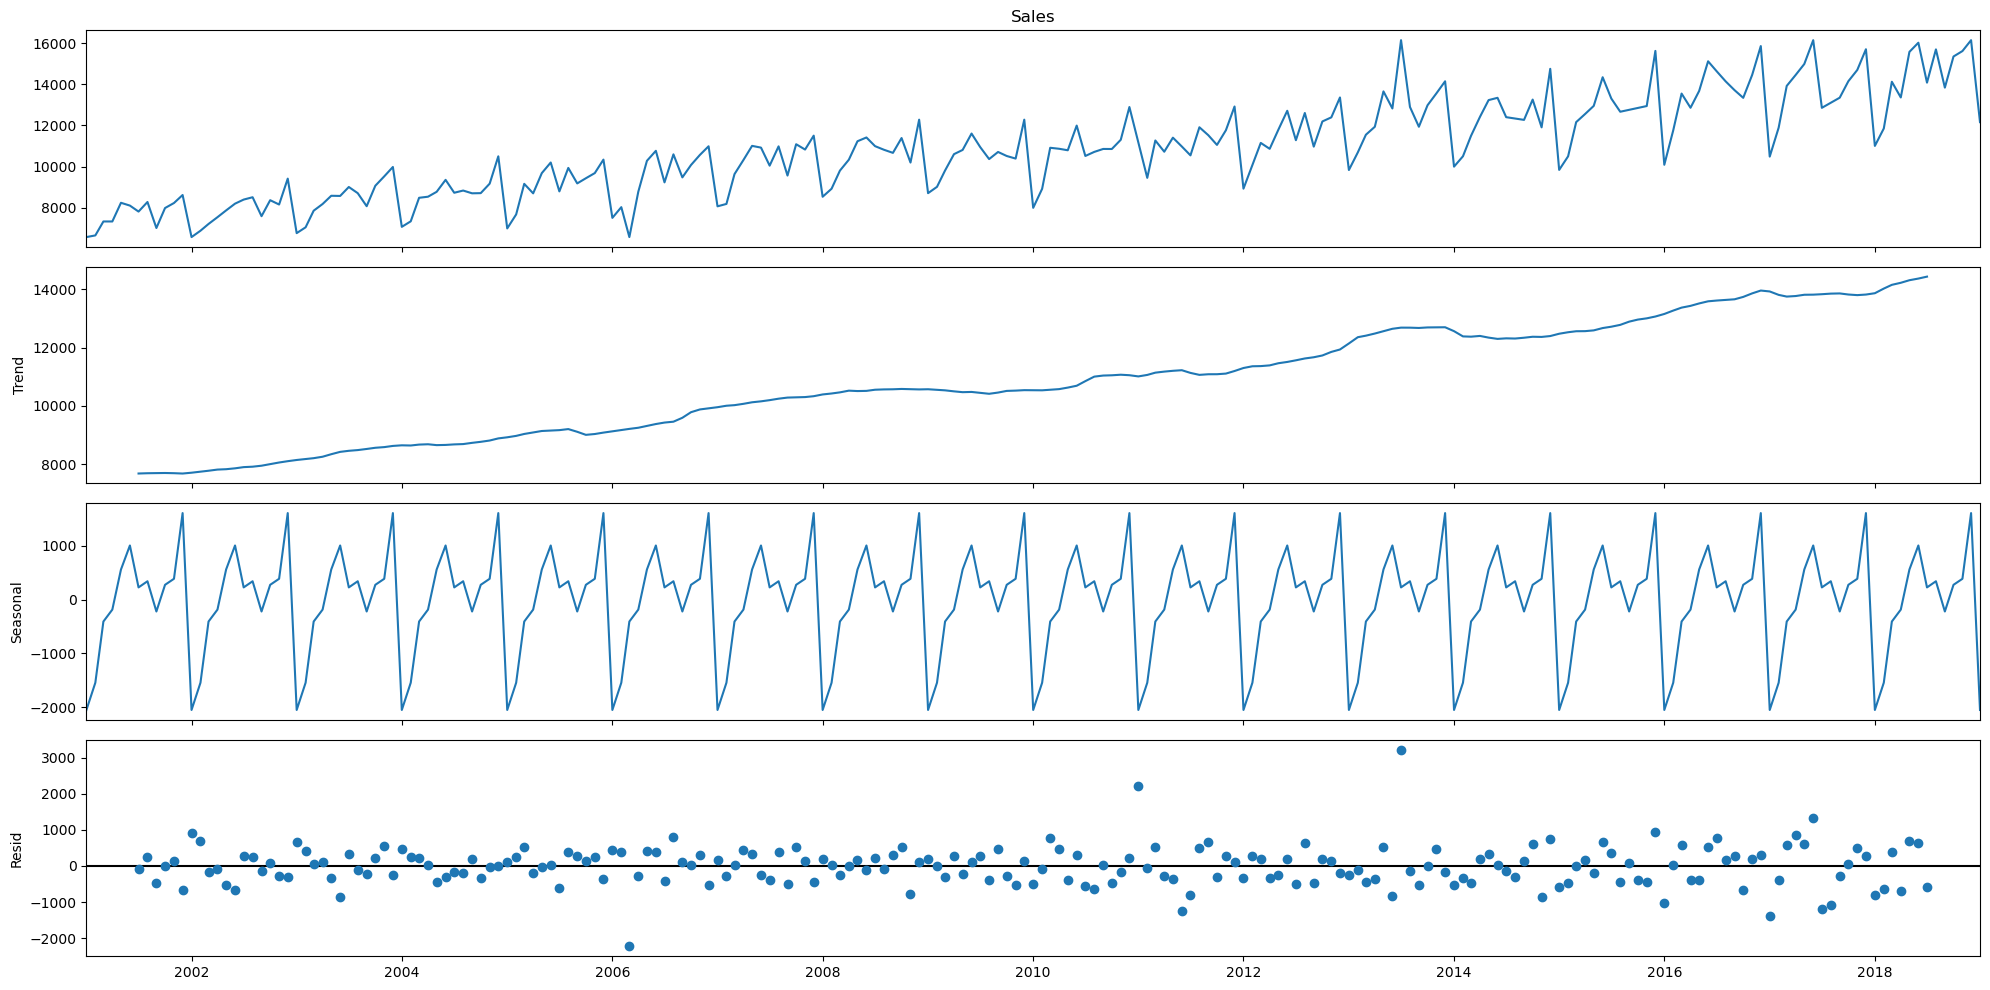

In [17]:
model.plot()

In [18]:
model.trend[-10:-5]

DATE
2018-04-01    14225.375000
2018-05-01    14313.625000
2018-06-01    14370.186667
2018-07-01    14436.665000
2018-08-01             NaN
Name: trend, dtype: float64

In [19]:
model.seasonal[-10:-5]

DATE
2018-04-01    -185.047675
2018-05-01     559.648403
2018-06-01    1006.155854
2018-07-01     227.369231
2018-08-01     341.476835
Name: seasonal, dtype: float64

In [20]:
model.resid[-10:-5]

DATE
2018-04-01   -680.327325
2018-05-01    702.726597
2018-06-01    644.657479
2018-07-01   -584.034231
2018-08-01           NaN
Name: resid, dtype: float64

In [21]:
mobile_sales.Sales[-10:-5]

DATE
2018-04-01    13360.0
2018-05-01    15576.0
2018-06-01    16021.0
2018-07-01    14080.0
2018-08-01    15697.0
Name: Sales, dtype: float64

In [22]:
14225.375000 - 185.047675 -680.327325

13360.0

In [23]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='multiplicative')

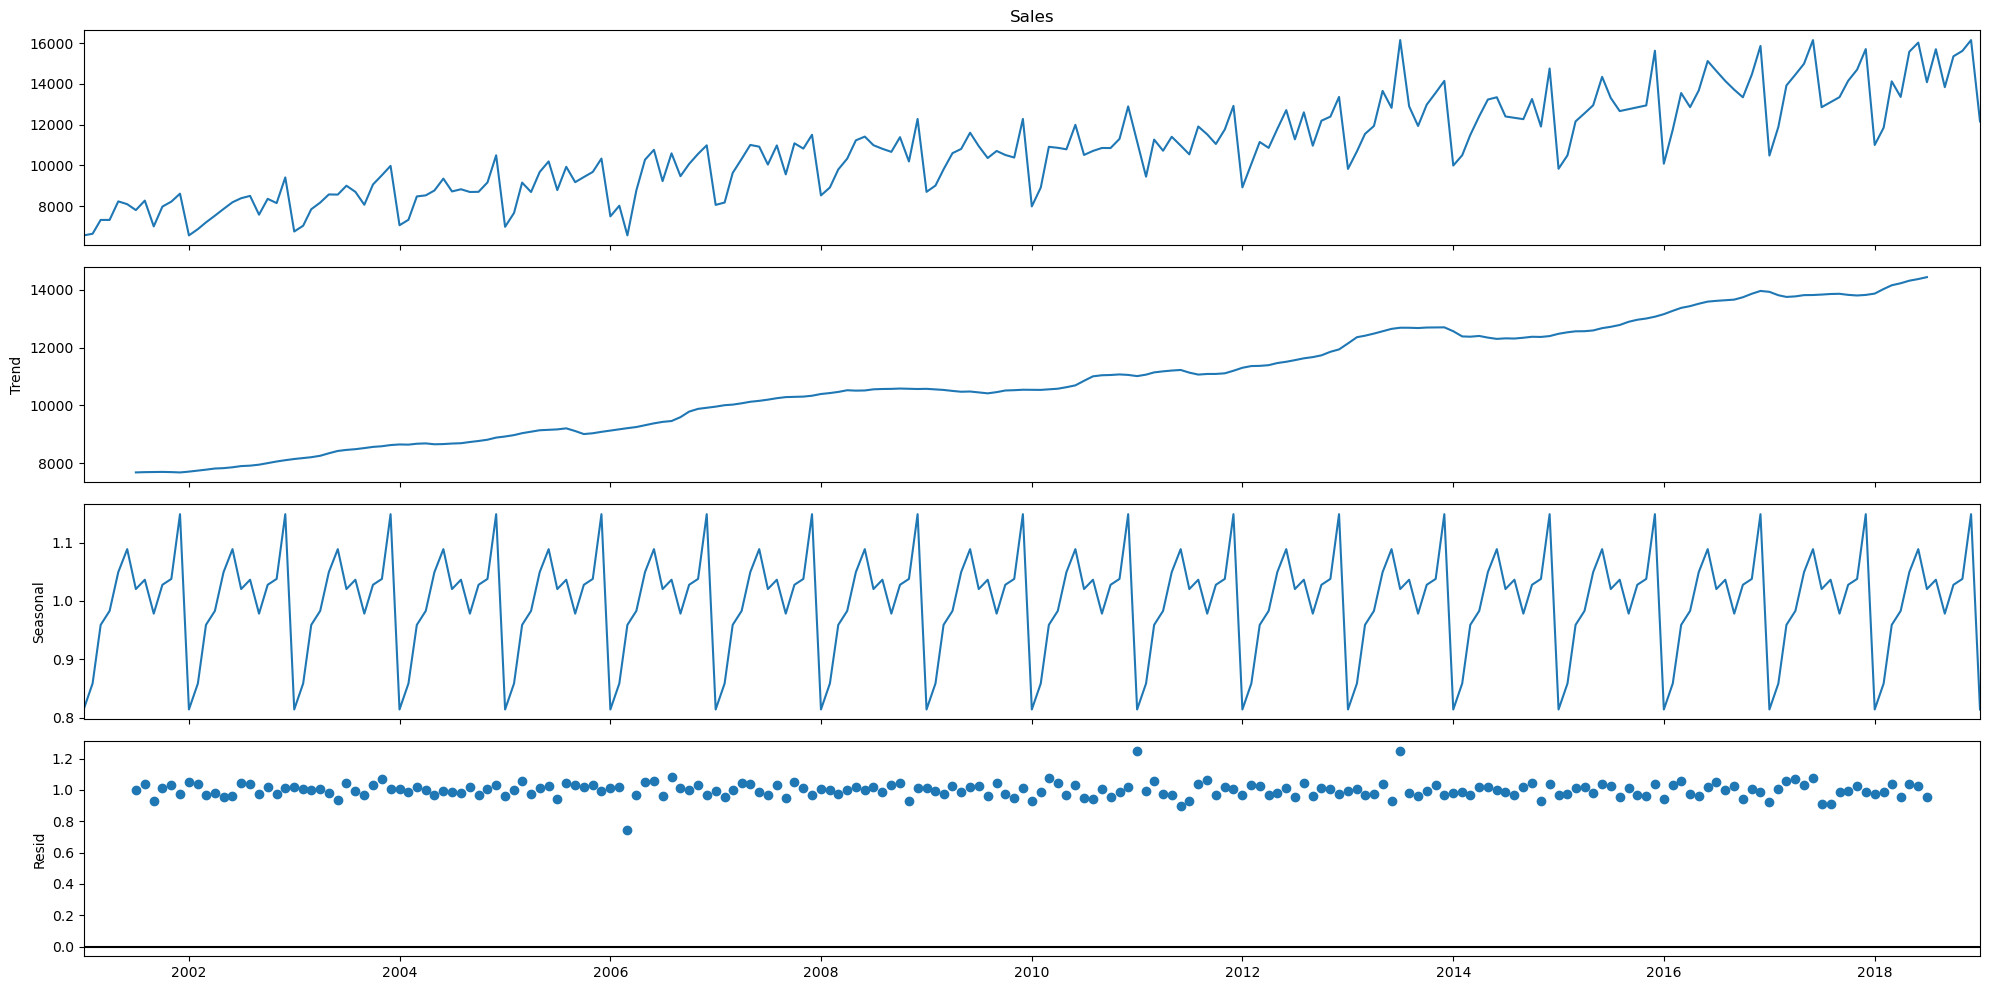

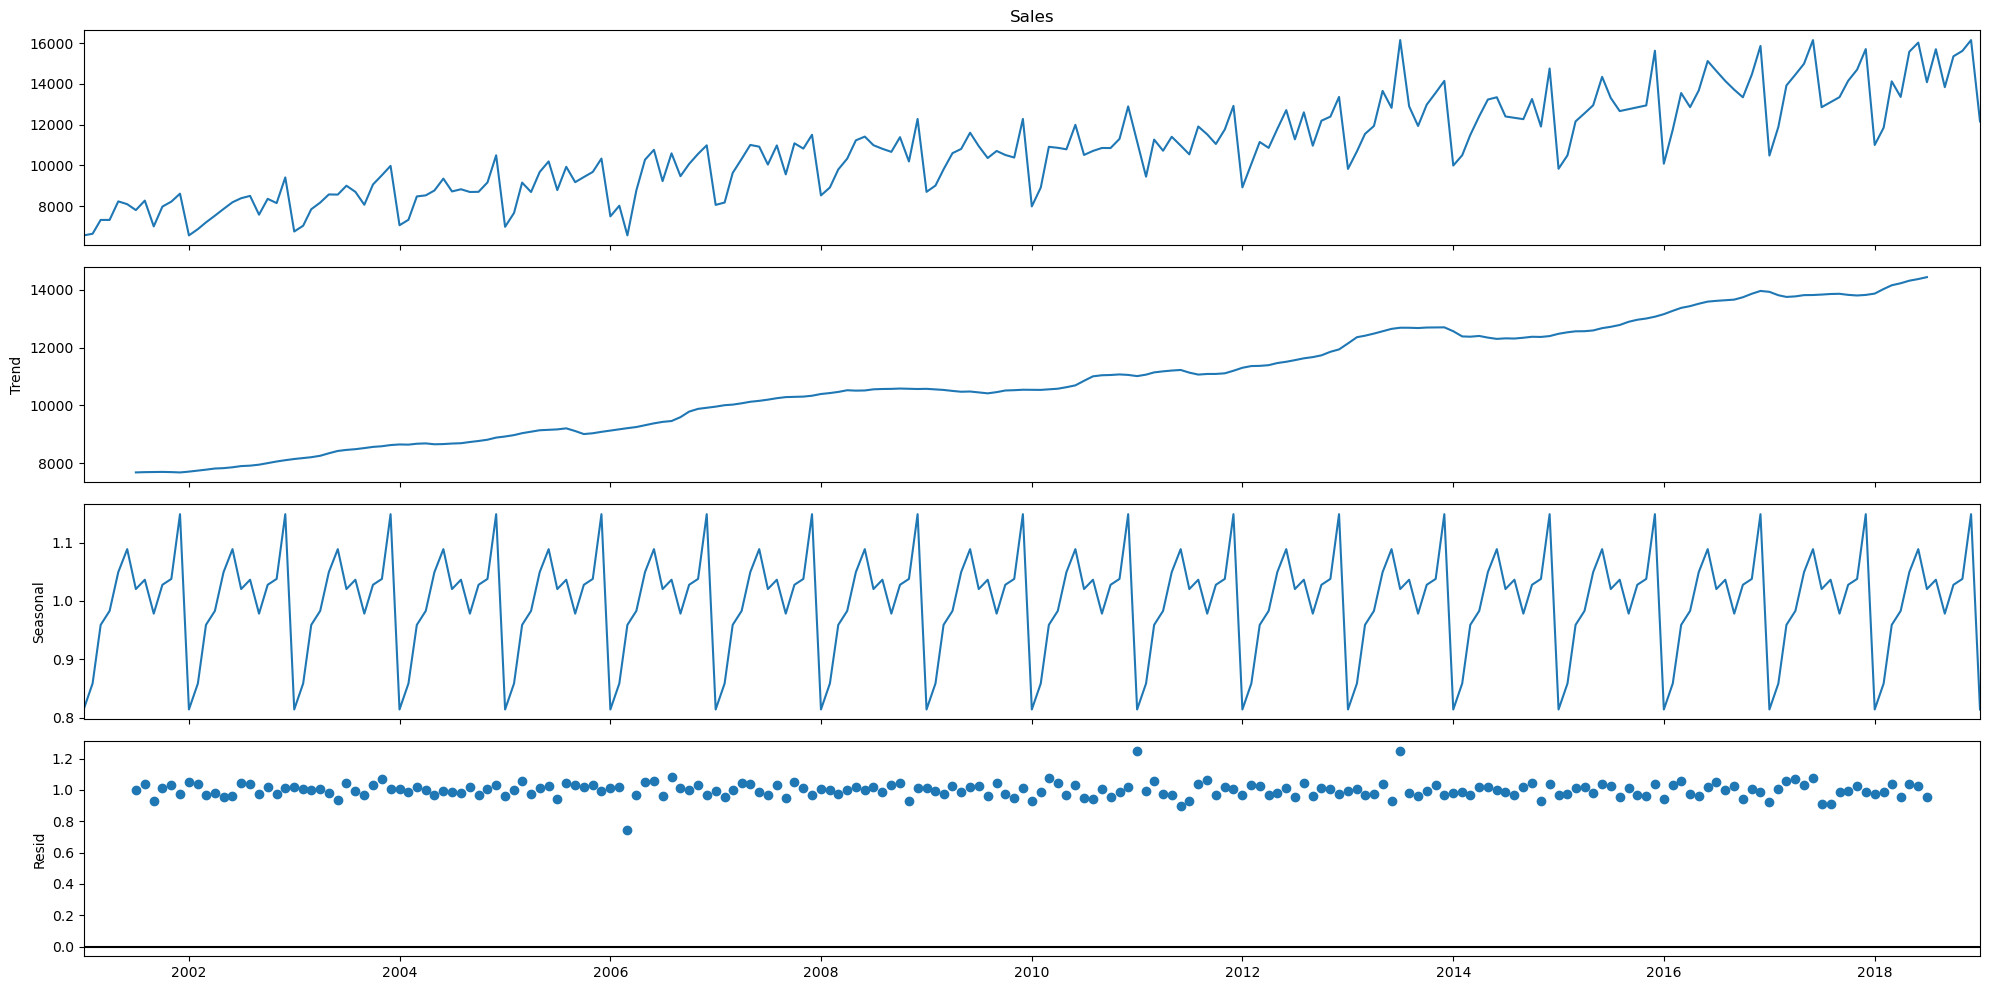

In [24]:
model.plot()

In [25]:
model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

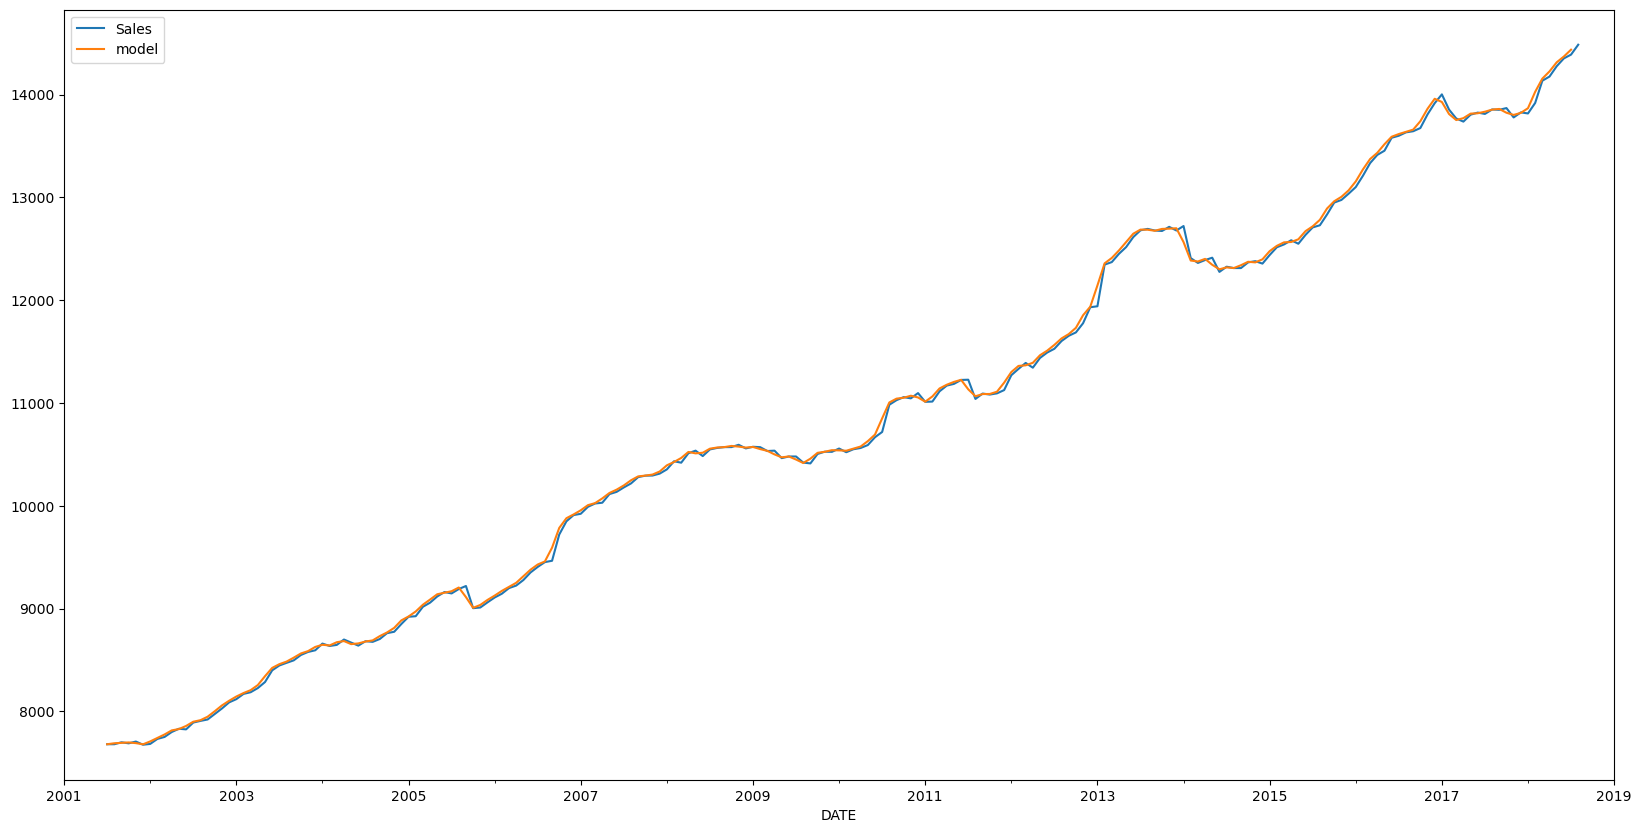

In [26]:
trend = mobile_sales.rolling(12, center=True).mean()
trend.plot(label = "ma")
model.trend.plot(label = "model")
plt.legend()

<Axes: xlabel='DATE'>

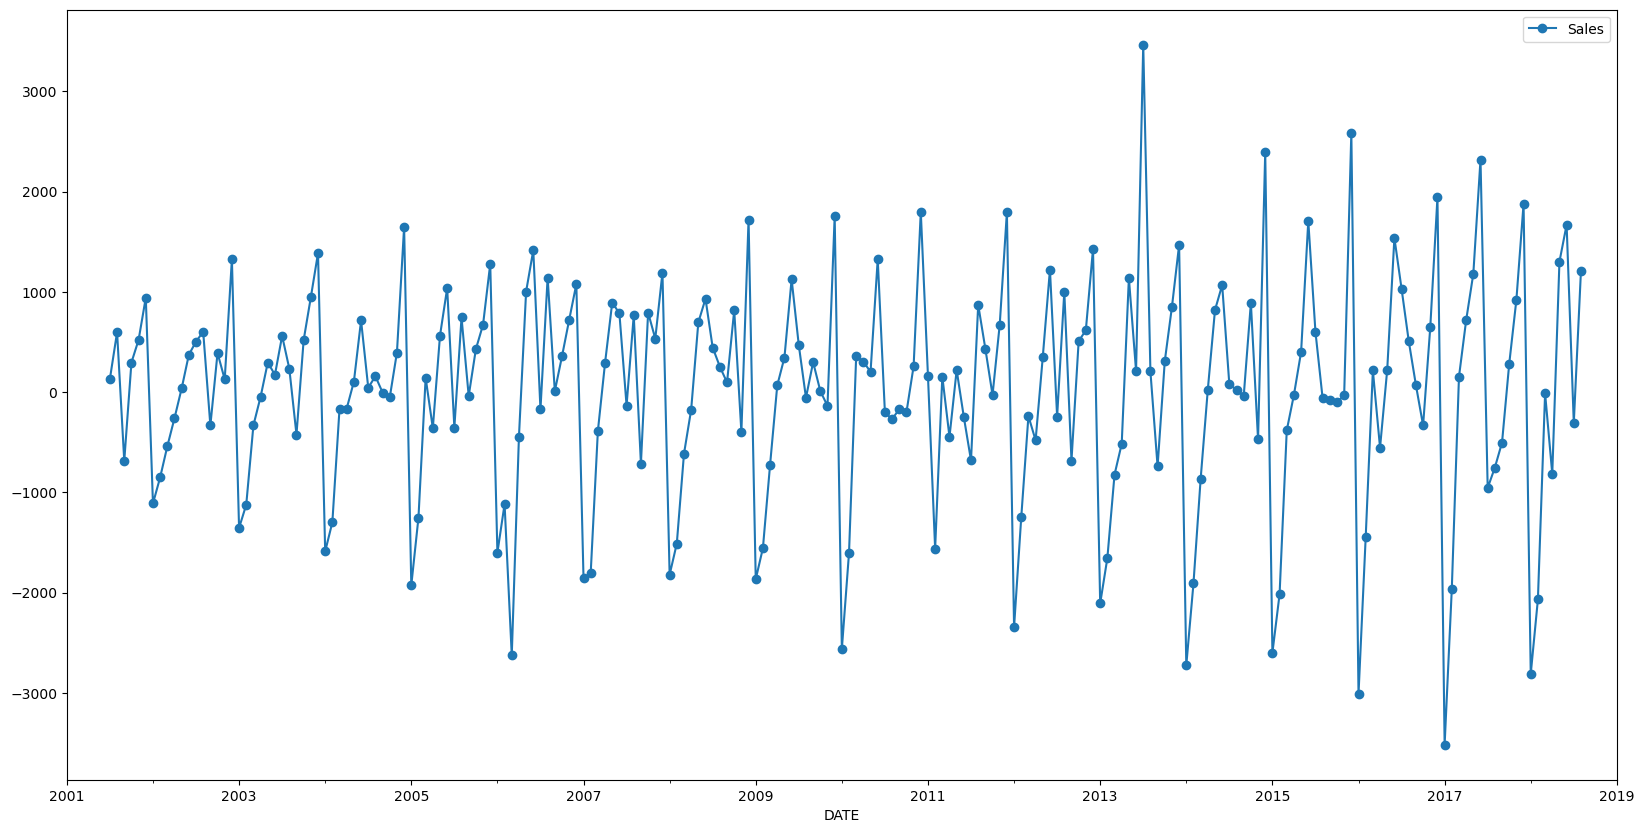

In [27]:
de_trend = mobile_sales - trend
de_trend.plot(style = "o-")

<Axes: xlabel='DATE'>

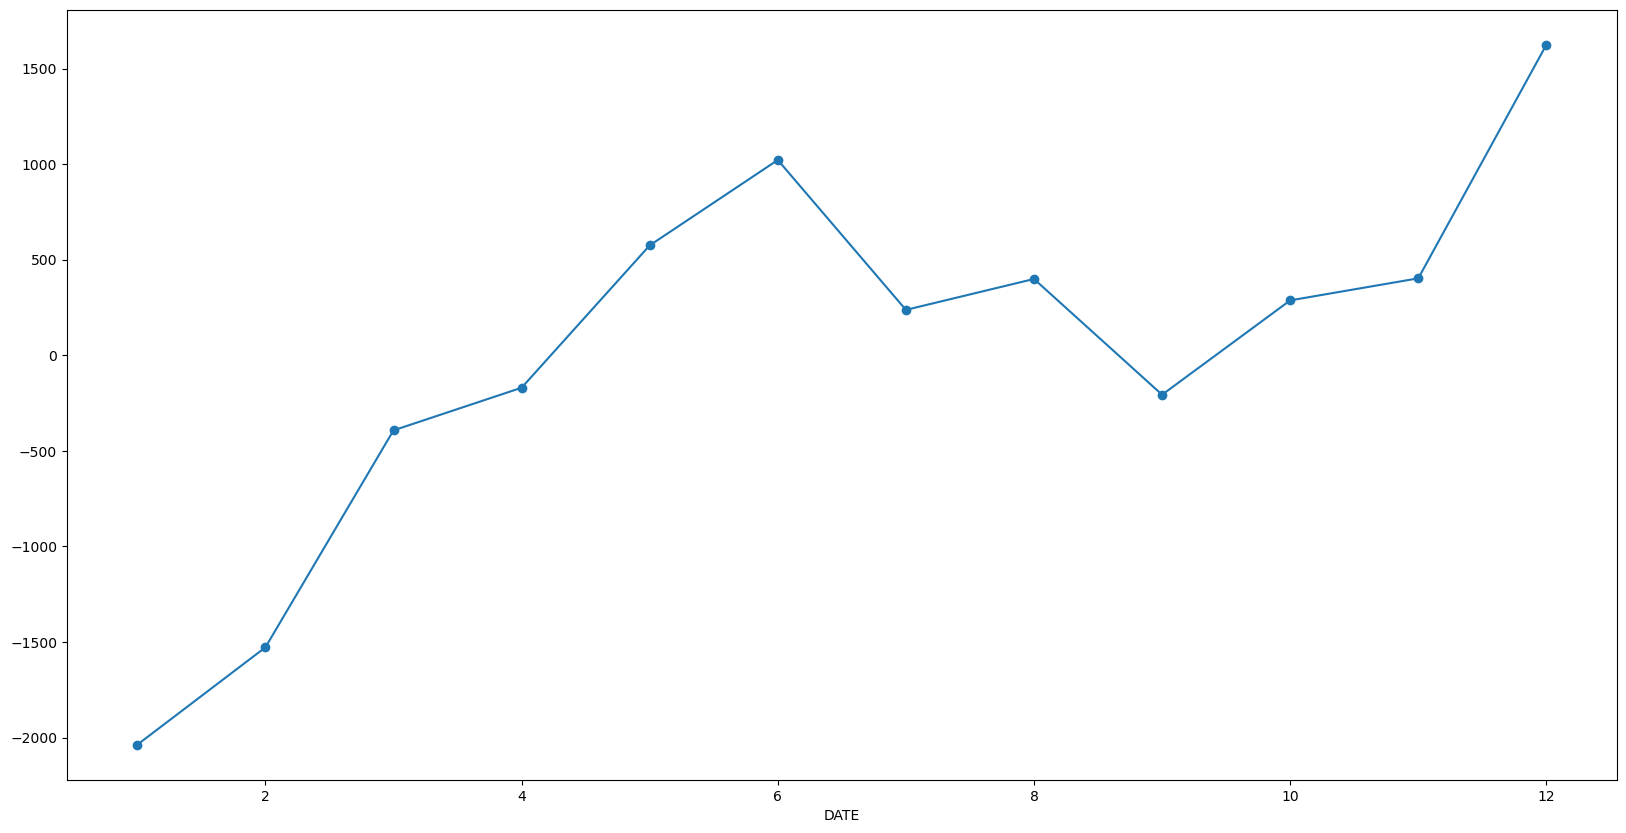

In [28]:
dtf = de_trend.reset_index()
dtf.groupby(dtf.DATE.dt.month)['Sales'].mean().plot(style='-o')

<Axes: xlabel='DATE'>

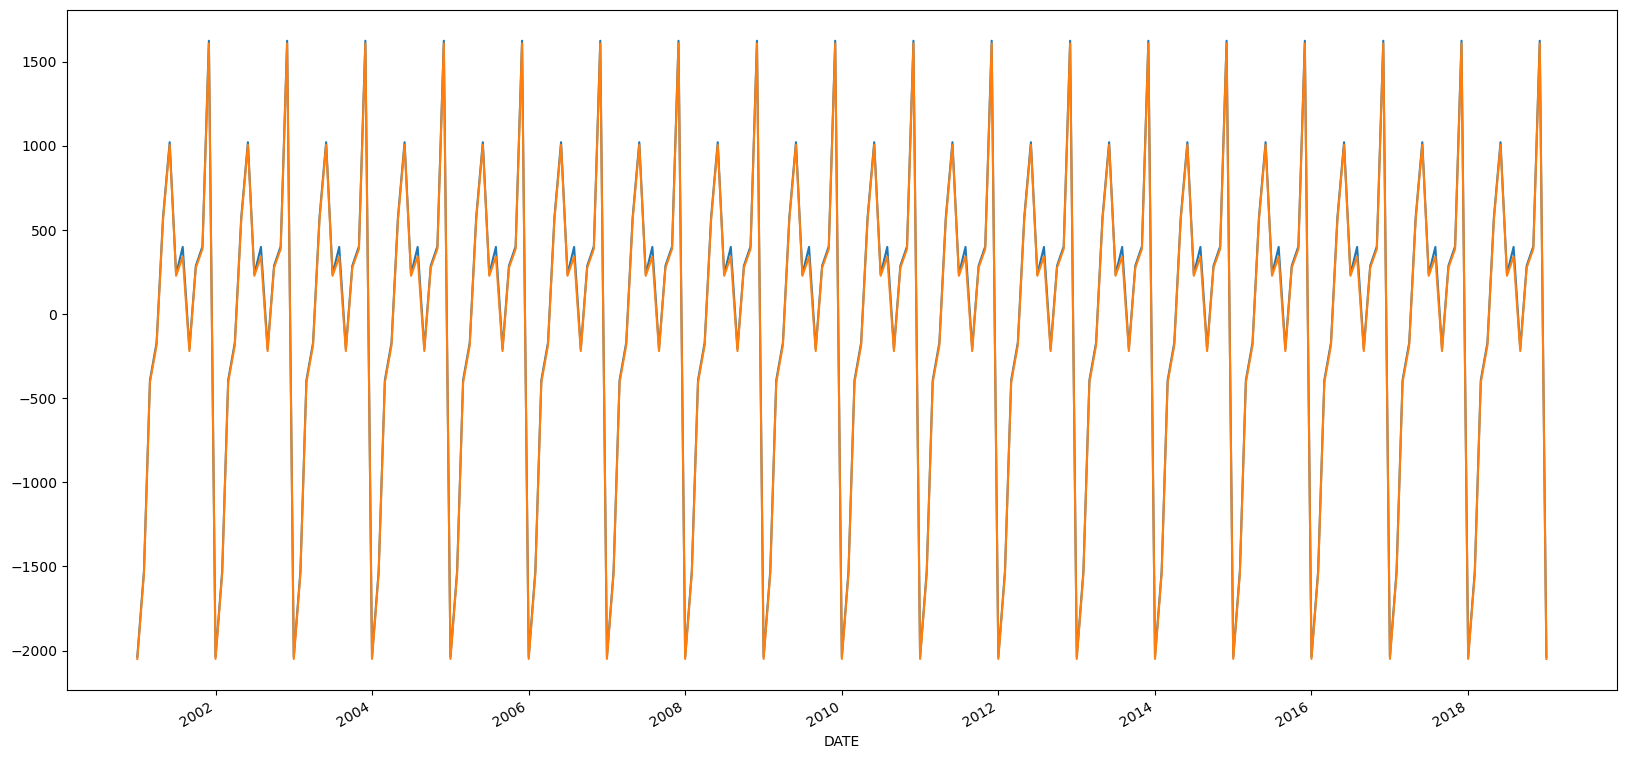

In [29]:
plt.plot(dtf.DATE, dtf.groupby(dtf.DATE.dt.month)['Sales'].transform('mean'))
model.seasonal.plot()

## SImple forecasting methods in action , train vs test performance 

In [30]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted)*100, 3))

In [31]:
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

test_x

Sales
DATE                
2018-02-01  11852.00
2018-03-01  14123.00
2018-04-01  13360.00
2018-05-01  15576.00
2018-06-01  16021.00
2018-07-01  14080.00
2018-08-01  15697.00
2018-09-01  13838.00
2018-10-01  15351.00
2018-11-01  15615.00
2018-12-01  16144.48
2019-01-01  12160.00

MAE : 3479.79
RMSE : 3757.483
MAPE: 23.24


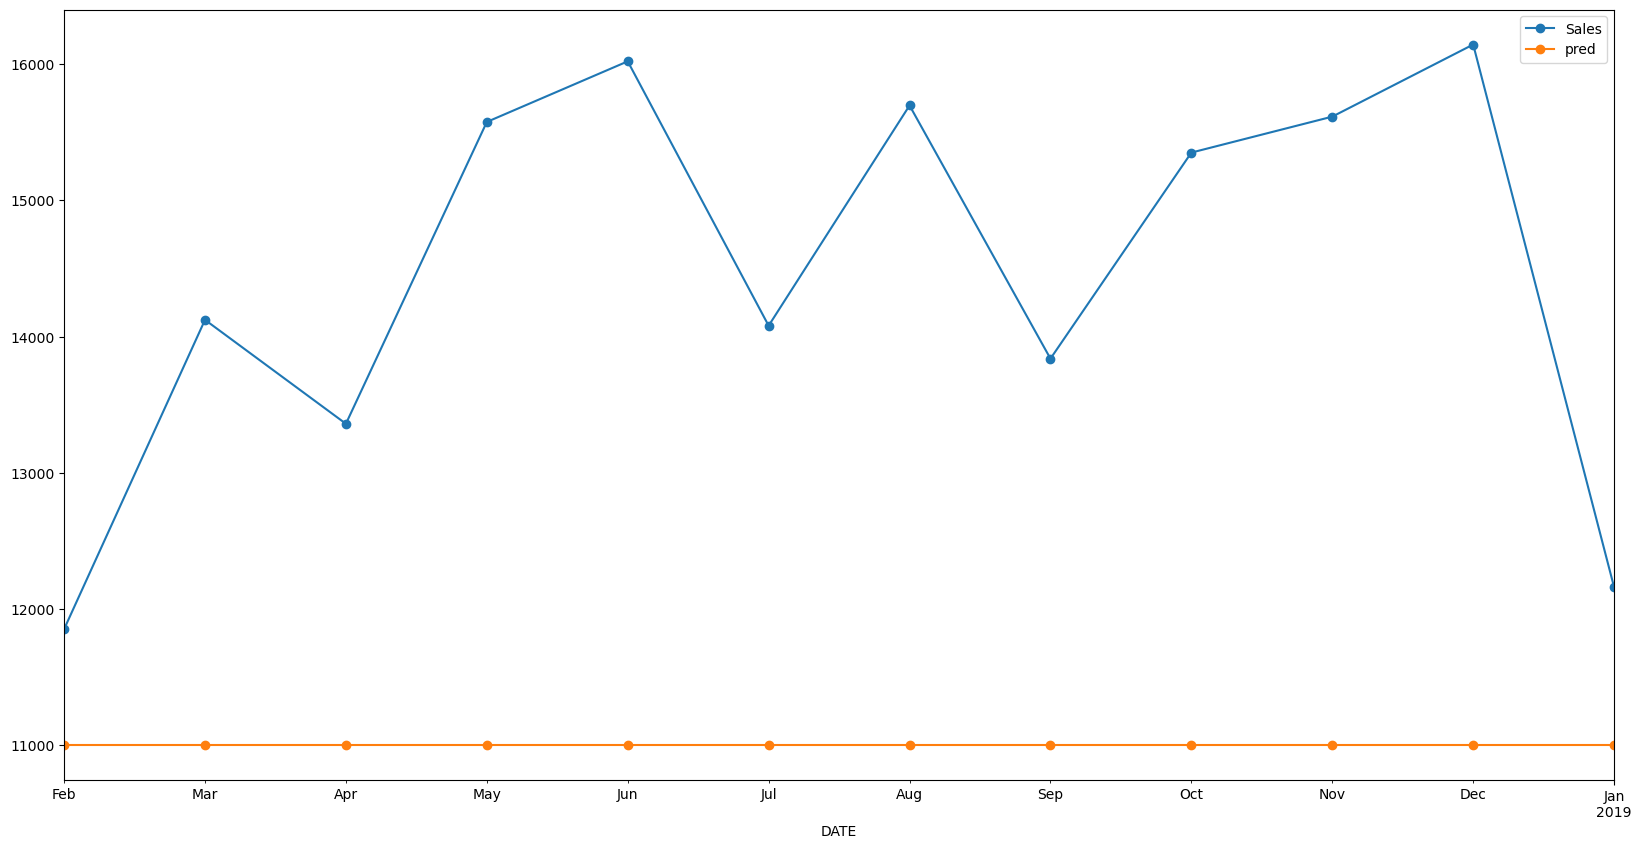

In [32]:
test_x['pred'] = train_x['Sales'][-1]

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

MAE : 3832.336
RMSE : 4086.14
MAPE: 25.699


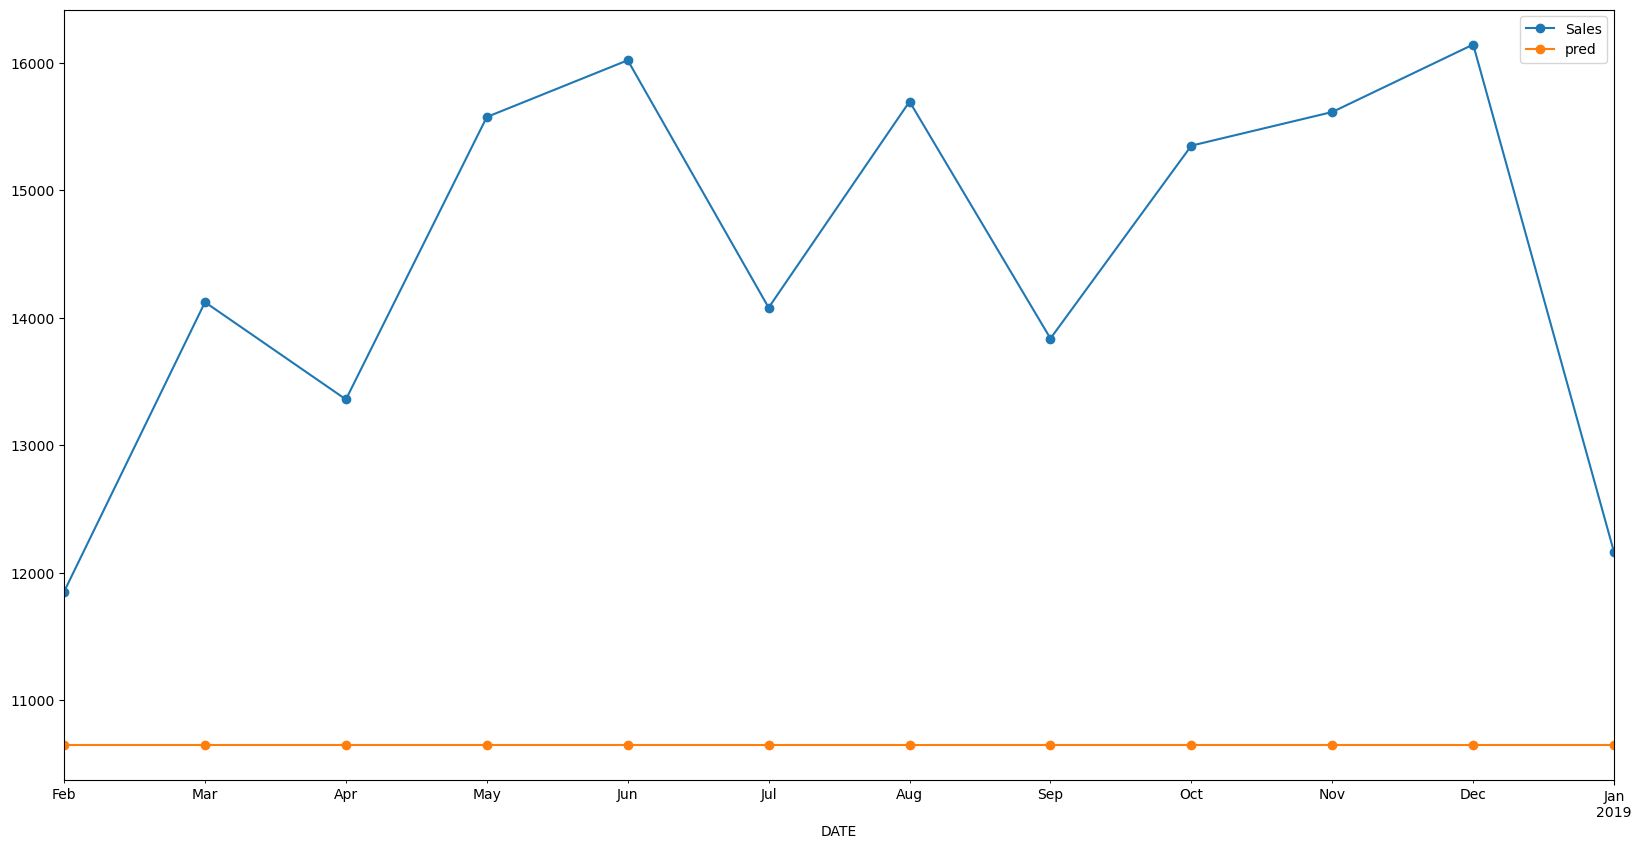

In [33]:
# Global mean or entire train data mean 
test_x['pred'] = train_x['Sales'].mean()

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

In [34]:
test_x.index

DatetimeIndex(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

MAE : 839.08
RMSE : 1075.542
MAPE: 5.765


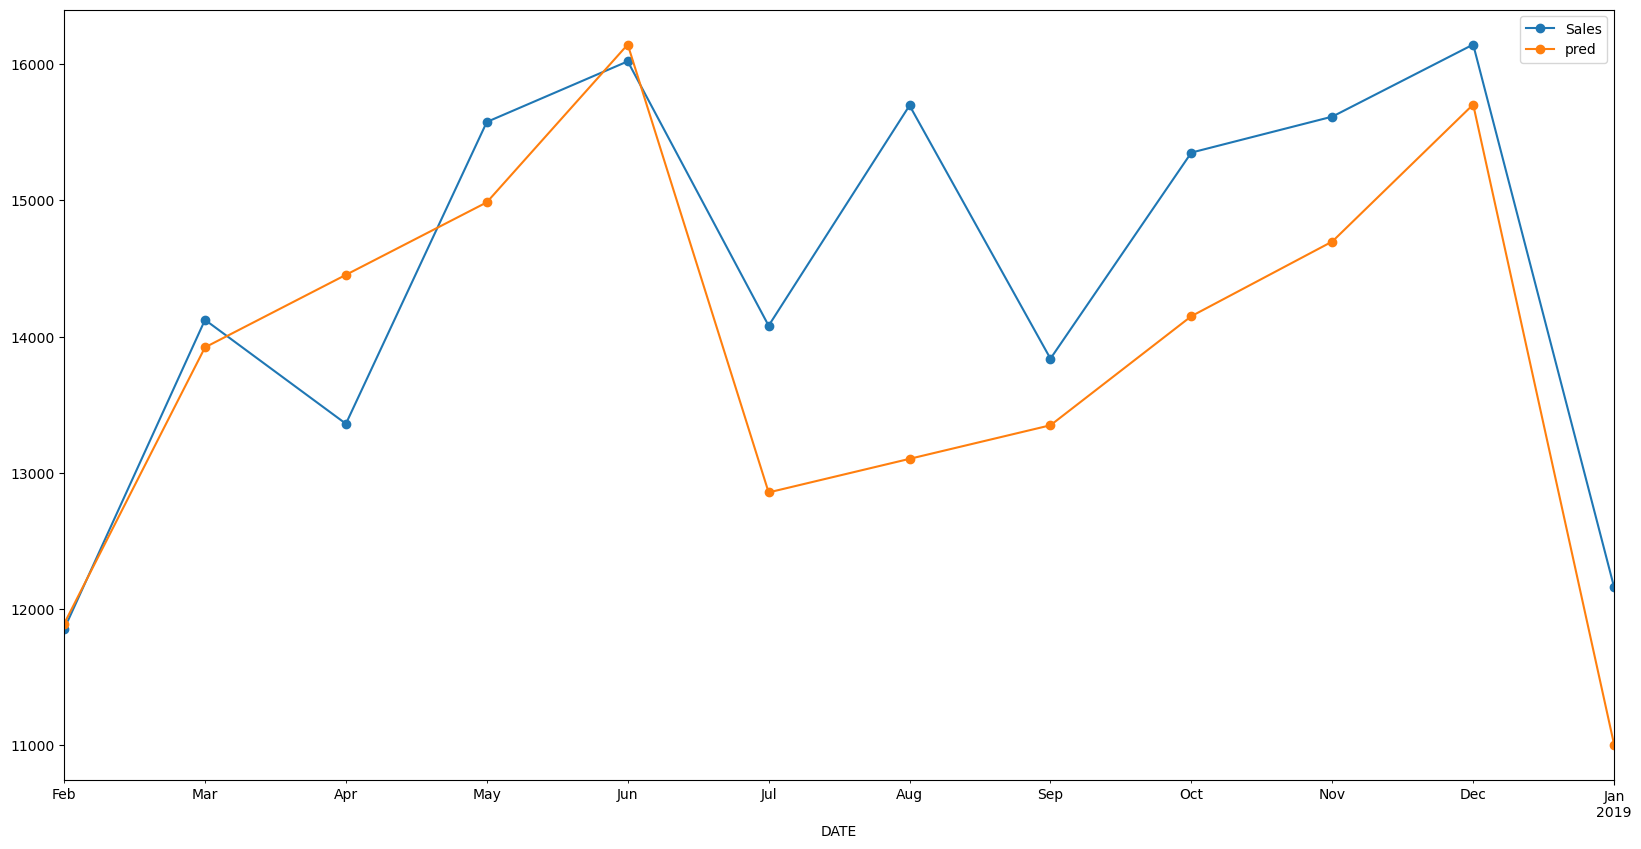

In [35]:
# Seasonal naive method 

for i in test_x.index:
    test_x.loc[i]['pred'] = train_x.loc[i - pd.DateOffset(years=1)].Sales

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

MAE : 3360.892
RMSE : 3640.673
MAPE: 22.424


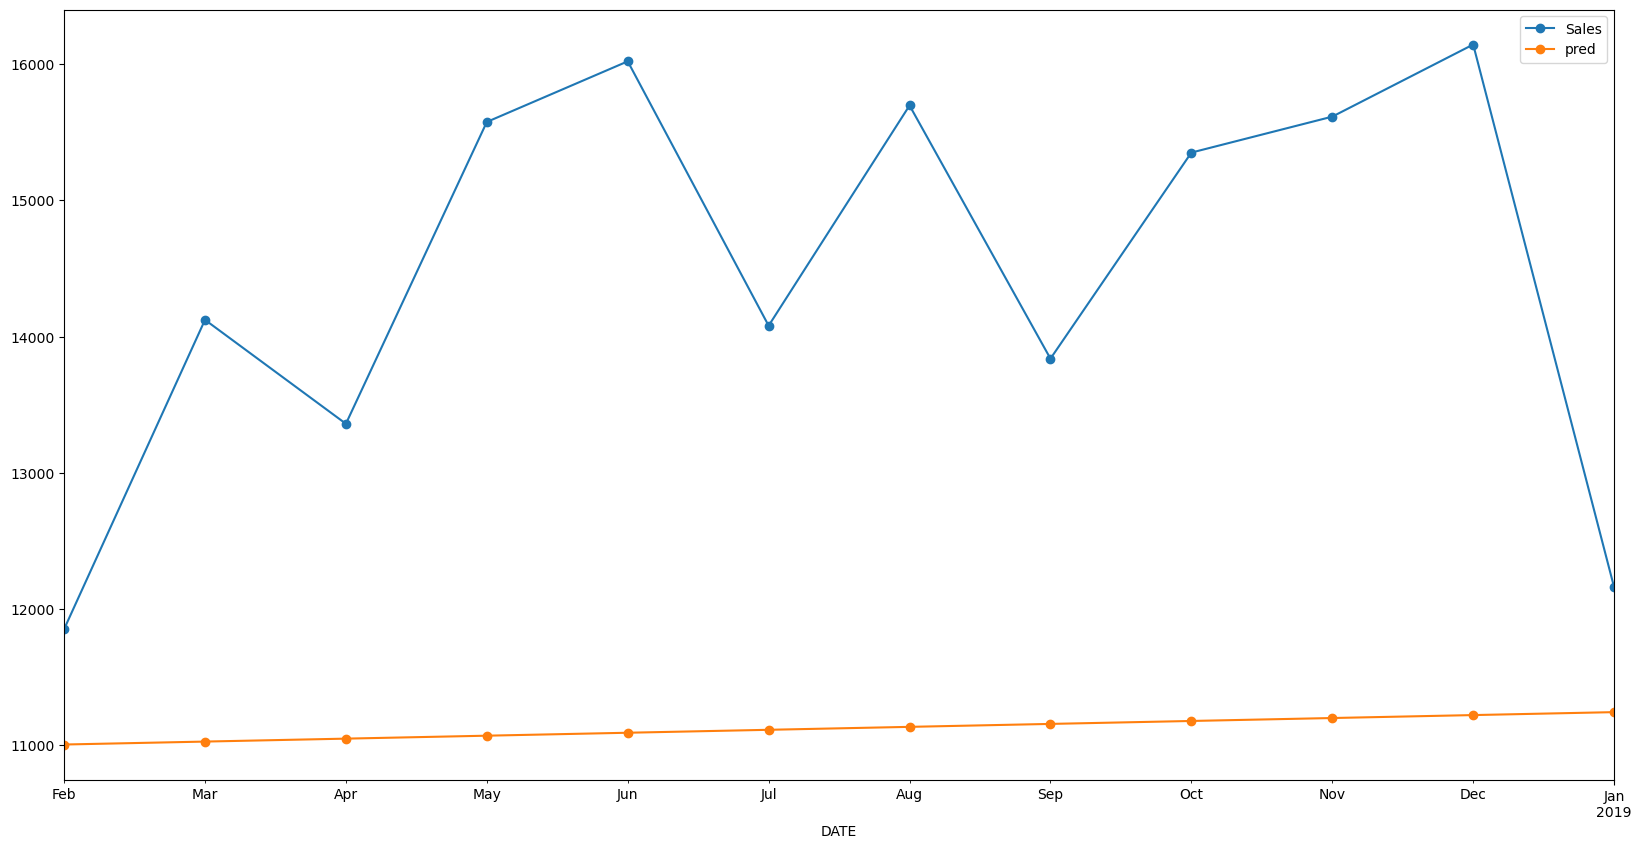

In [36]:
## Drift method 

y_t = train_x['Sales'][-1]
y_0 = train_x['Sales'][0]

m = (y_t - y_0) / len(train_x['Sales'])
h = np.linspace(0,len(test_x)-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')

performance(test_x['Sales'], test_x['pred'])

## Simple exponetial smoothing 

In [37]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales)
_ = model.fit(smoothing_level = 0.6)
_.fittedvalues

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


DATE
2001-01-01     6573.360000
2001-02-01     6573.360000
2001-03-01     6621.744000
2001-04-01     7047.897600
2001-05-01     7218.359040
                  ...     
2018-09-01    15275.399887
2018-10-01    14412.959955
2018-11-01    14975.783982
2018-12-01    15359.313593
2019-01-01    15830.413437
Length: 217, dtype: float64

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


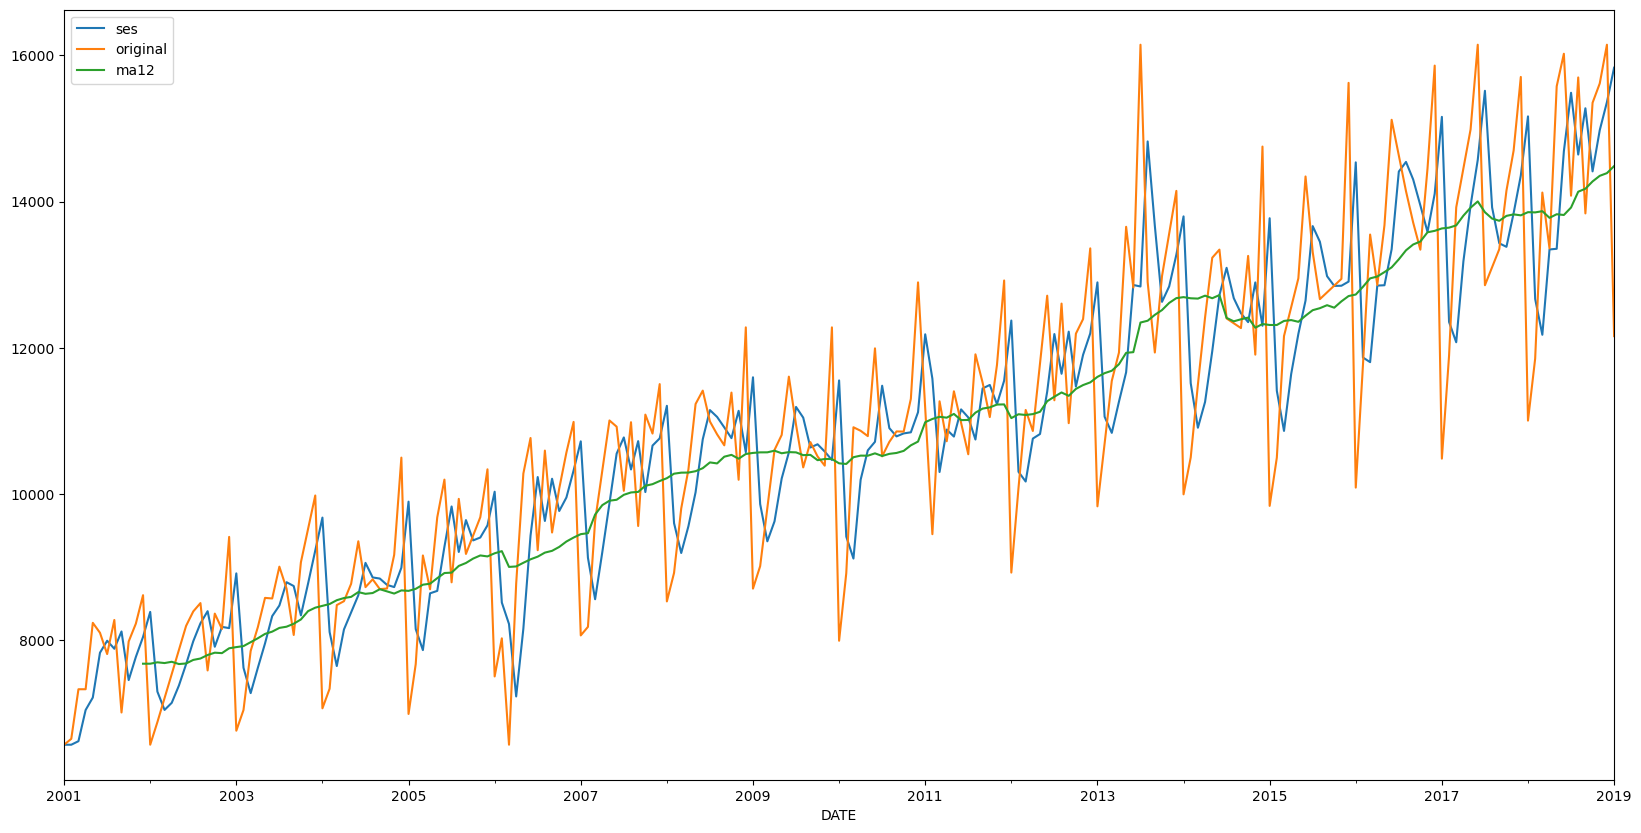

In [38]:
pred = pd.Series(sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.6).fittedvalues)

pred.plot(label='ses')
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12).mean().plot(label='ma12')
plt.legend()

In [39]:
## mape on entire training data 
mape(mobile_sales.Sales, pred)*100

9.35218552957409

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


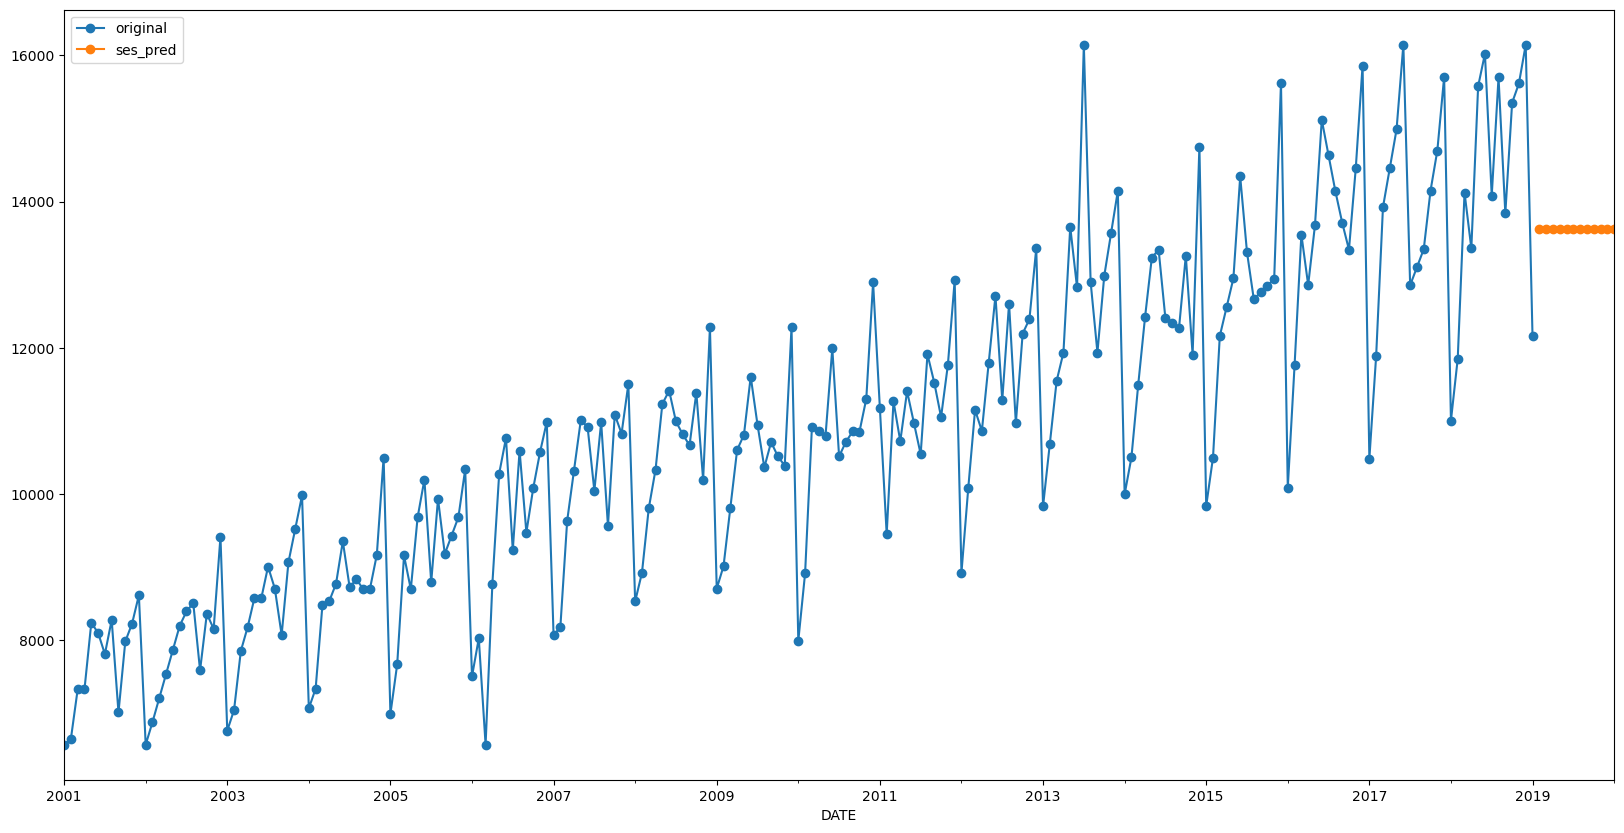

In [40]:
model = sm.tsa.SimpleExpSmoothing(mobile_sales.Sales).fit(smoothing_level=0.6)
pred = model.forecast(12)

mobile_sales.Sales.plot(label='original', style='-o')
pred.plot(label='ses_pred', style='-o')
plt.legend()

In [41]:
pred

2019-02-01    13628.165375
2019-03-01    13628.165375
2019-04-01    13628.165375
2019-05-01    13628.165375
2019-06-01    13628.165375
2019-07-01    13628.165375
2019-08-01    13628.165375
2019-09-01    13628.165375
2019-10-01    13628.165375
2019-11-01    13628.165375
2019-12-01    13628.165375
2020-01-01    13628.165375
Freq: MS, dtype: float64

In [42]:
test_x

Sales          pred
DATE                              
2018-02-01  11852.00  11005.000000
2018-03-01  14123.00  11026.617756
2018-04-01  13360.00  11048.235512
2018-05-01  15576.00  11069.853268
2018-06-01  16021.00  11091.471024
2018-07-01  14080.00  11113.088780
2018-08-01  15697.00  11134.706537
2018-09-01  13838.00  11156.324293
2018-10-01  15351.00  11177.942049
2018-11-01  15615.00  11199.559805
2018-12-01  16144.48  11221.177561
2019-01-01  12160.00  11242.795317

In [43]:
mape(test_x.Sales,pred )*100

9.78751384570306

# ML: Time Series Analysis - 2

**Simple Exponential Smoothing Caveat:** Giving higher weightage to the most recent point will actually make my forecast worse.

### Holt-Winters Technique (HWES)
- Double exponential and Triple Exponential was first proposed by Holt and then modified by Winters.

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


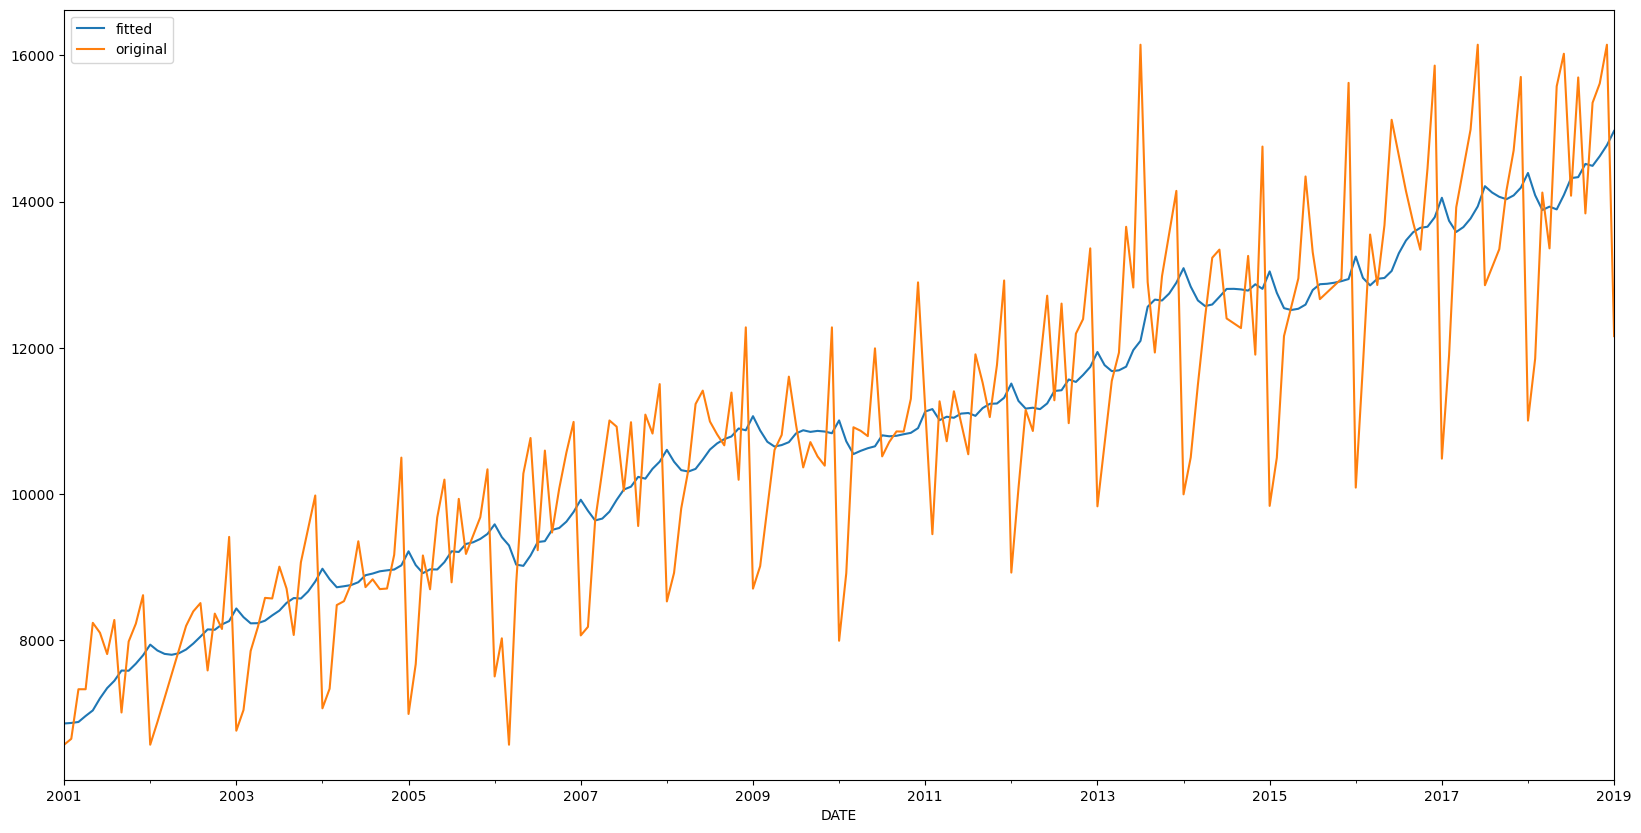

In [44]:
# double exponential Smoothing
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add').fit()   # trend = 'add' is for additive decomposition
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

- Doesn't give good results on the training data. Not a good fit. 
- It almost looks like the trend

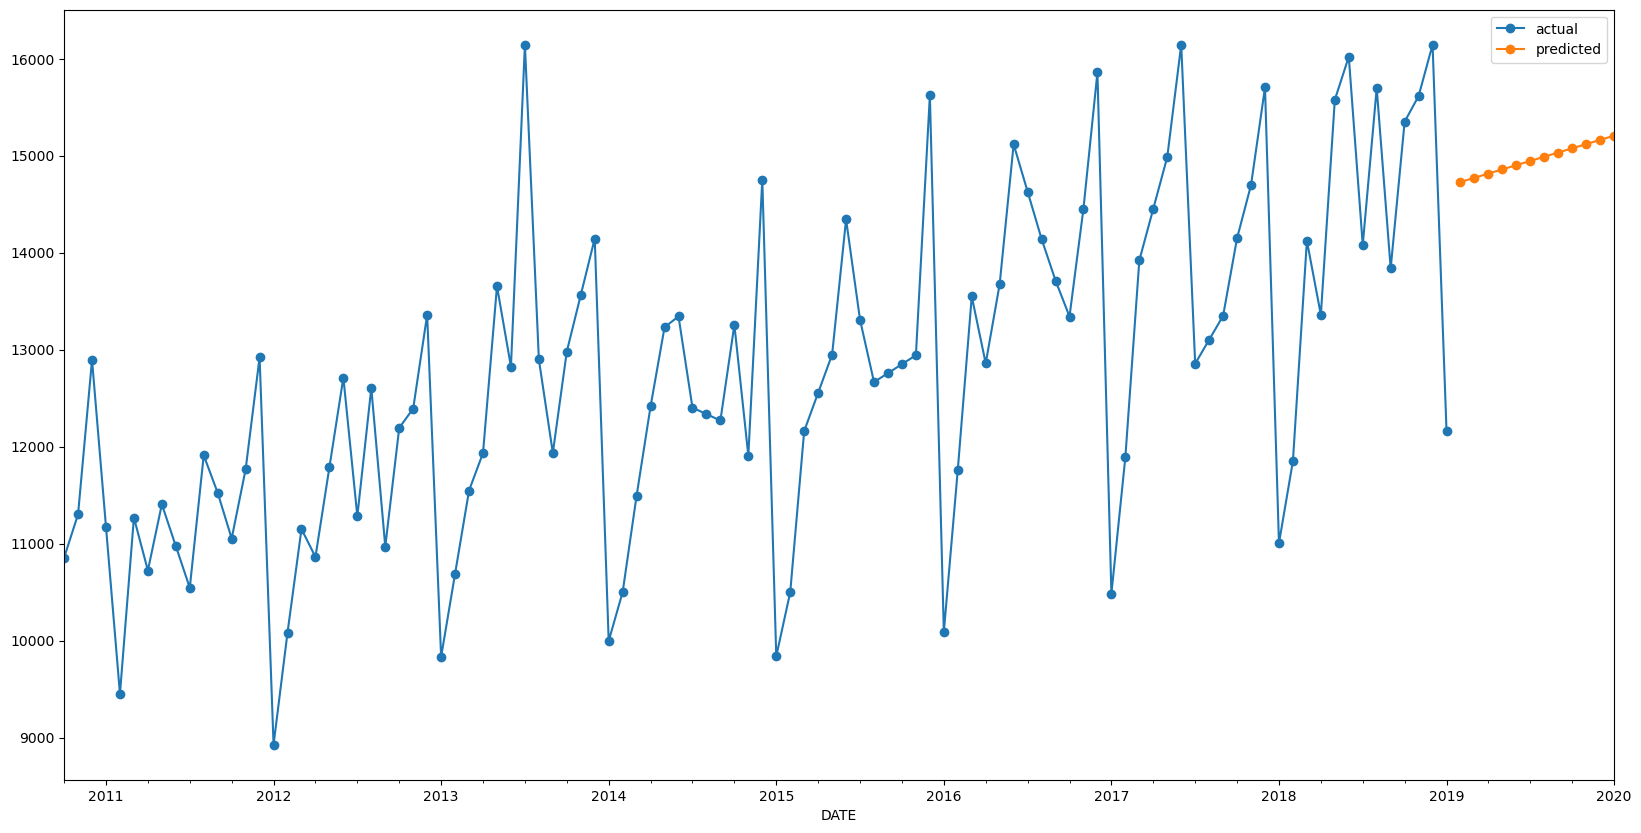

In [45]:
# checking forecast
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

- It is somewhat better.

- It's kind of projecting the trend over the next few points. See below:

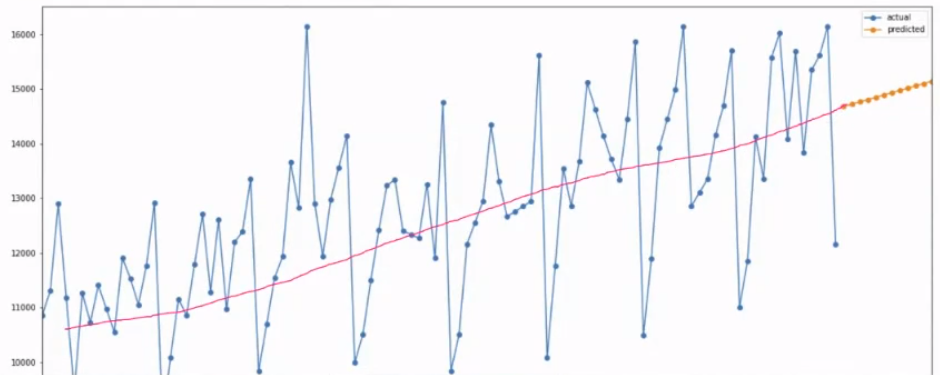

- Obviously, it won't be perfect. Why? Cuz in this data, we have strong seasonality also.

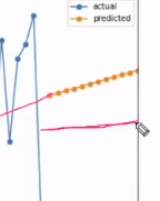

- ses was giving us a flat forecast. Compared to that, this is better as it is following the trend.

### Triple Exponential Smoothing

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


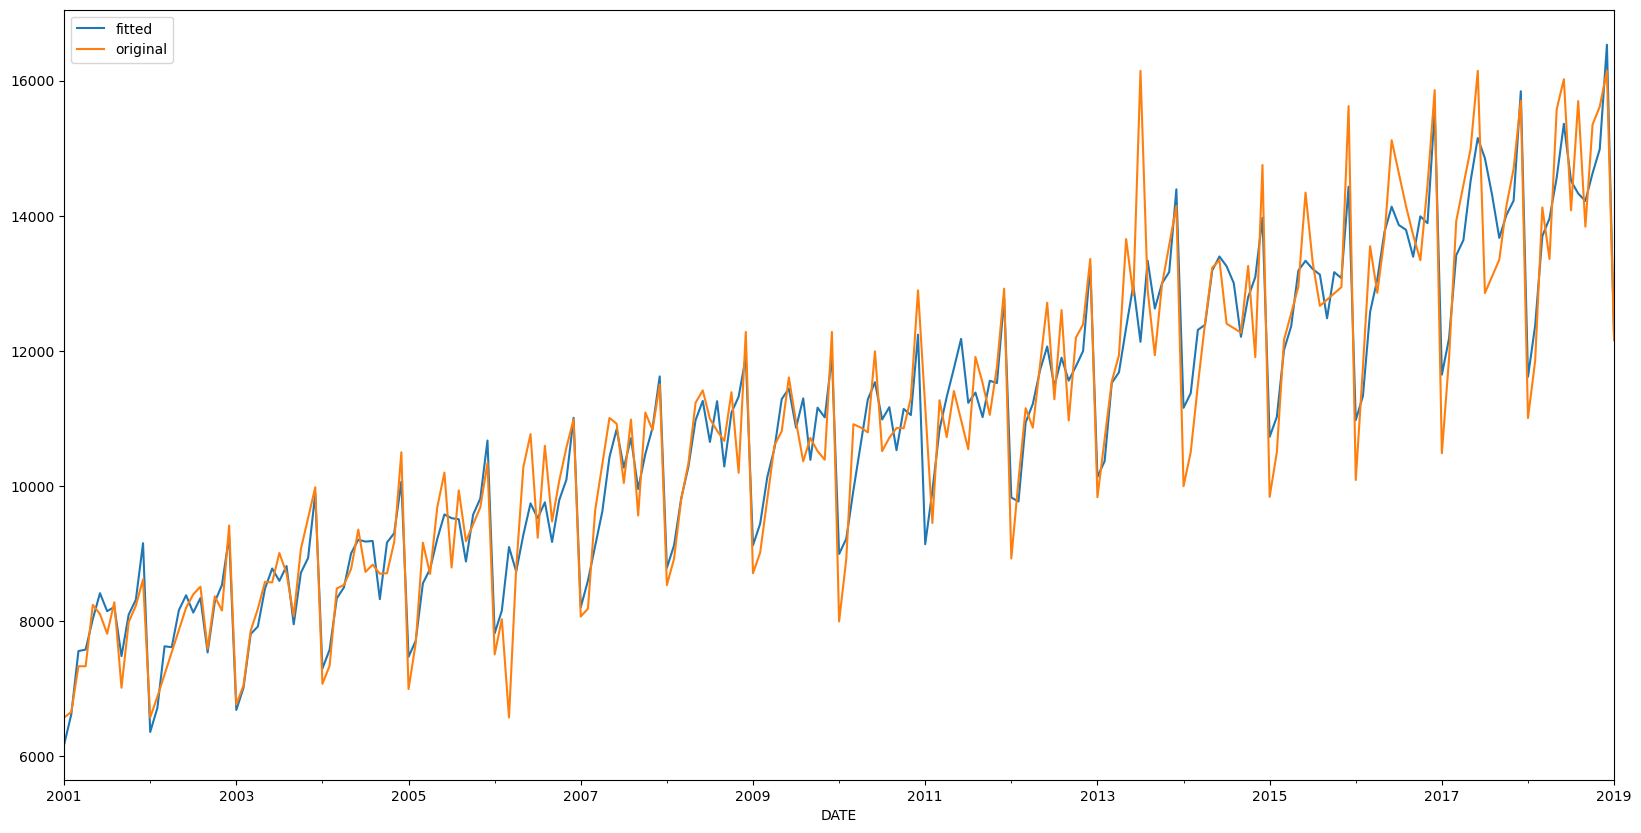

In [50]:
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='add', seasonal='add').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

- Blue line is very closely following the orange line.
- Ofcourse, it's not able to predict the outliers.

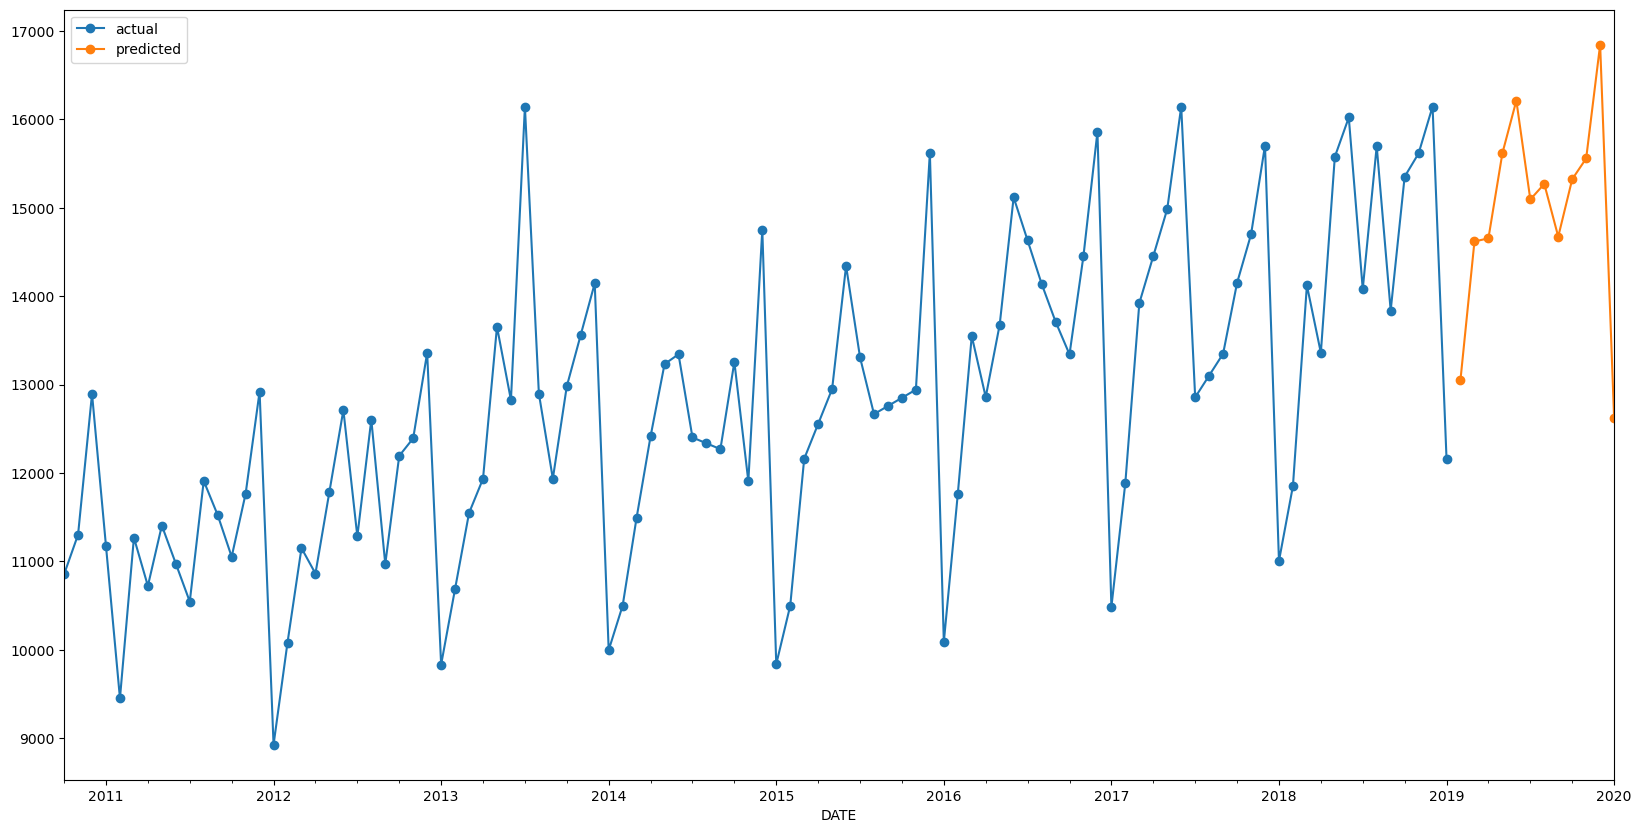

In [51]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

- The forecast has improved with the addition of seasonality in TES.

C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\khush\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


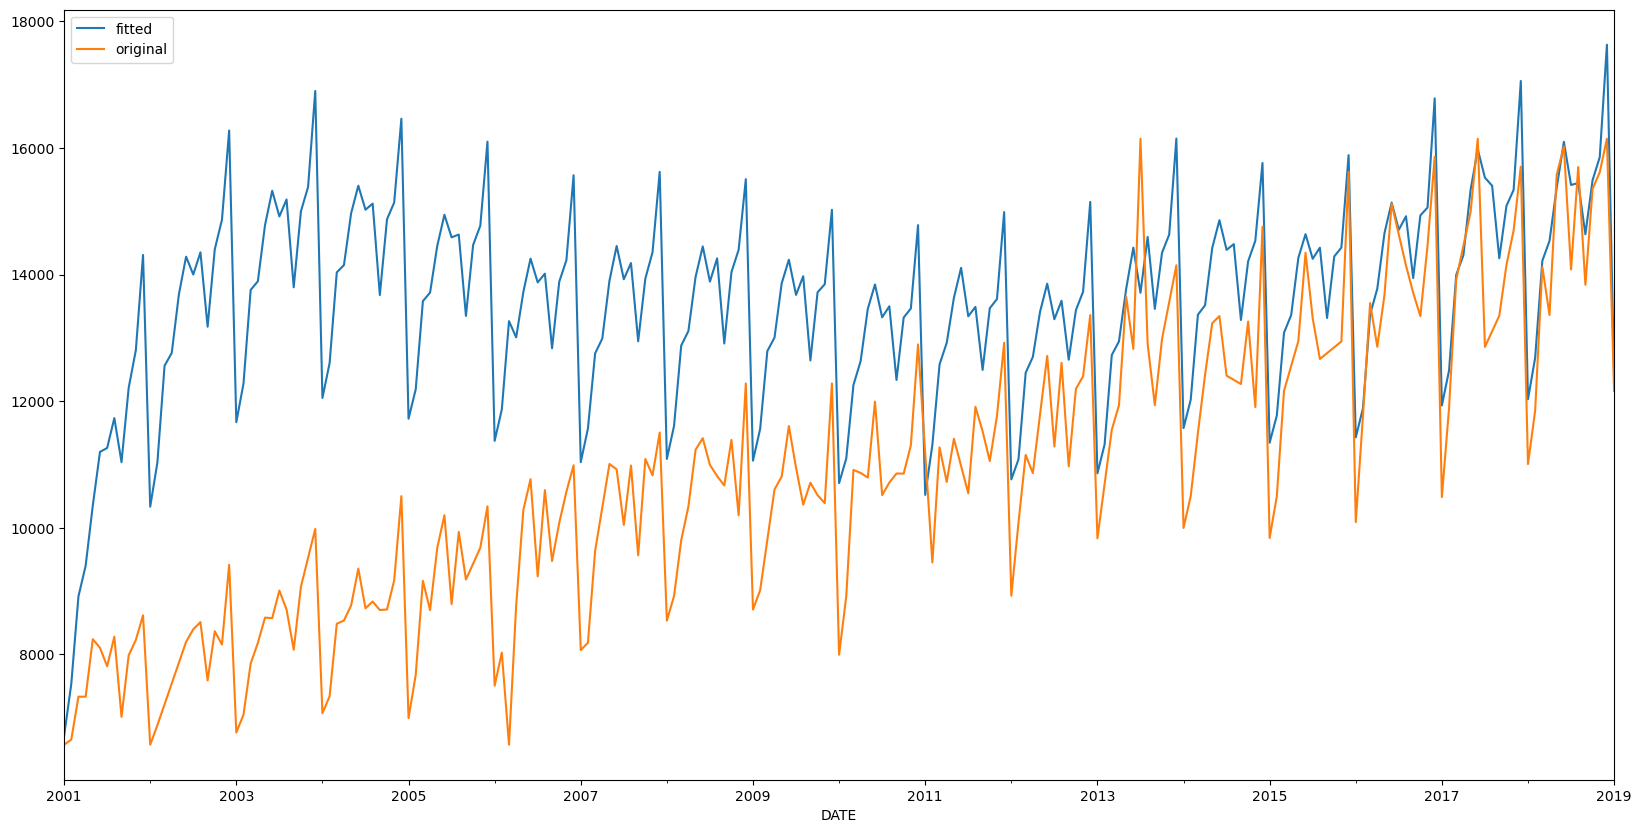

In [61]:
# Let's use multiplicative decomposition - We use this when we have non constant variance in seasonality.
model = sm.tsa.ExponentialSmoothing(mobile_sales.Sales, trend='mul', seasonal='mul').fit()
model.fittedvalues.plot(label='fitted')
mobile_sales.Sales.plot(label='original')
plt.legend()

- Since our time series has somewhat constant seasonality, multiplicative decomposition is not giving good results. 

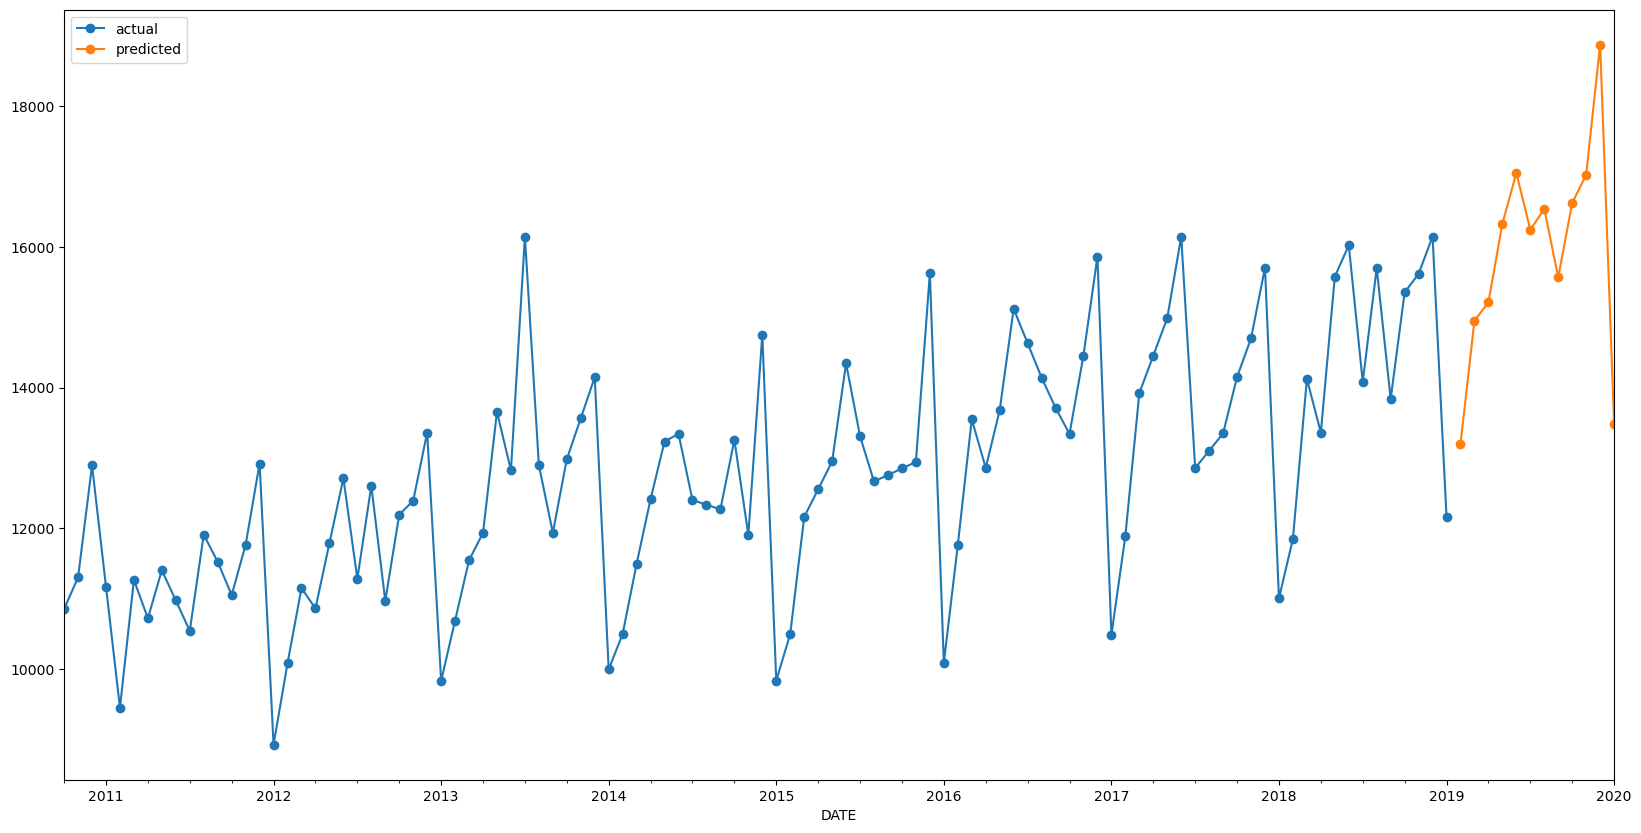

In [62]:
pred = model.forecast(steps = 12)
mobile_sales.Sales.tail(100).plot(style='-o', label='actual')
pred.plot(style='-o', label='predicted')
plt.legend()

- Forecast looks same as in case of additive decomposition. But, it's not ideal to use multiplicative decomposition for this time series.

### DFT Test (Dickey Fuller Test) for Checking Stationarity

<Axes: xlabel='DATE'>

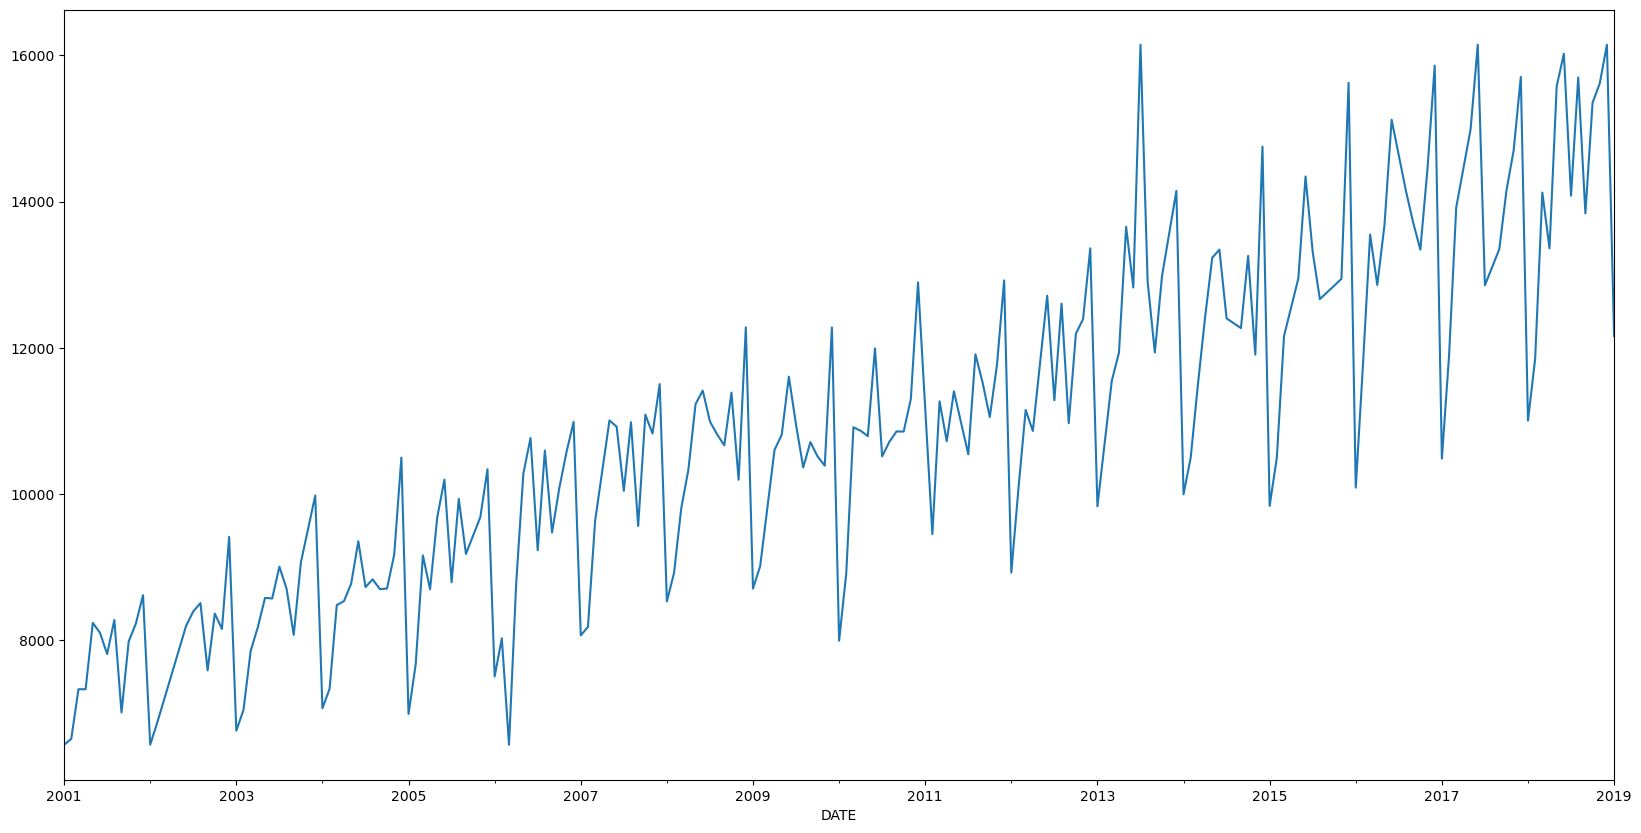

In [63]:
mobile_sales.Sales.plot()

In [64]:
sm.tsa.stattools.adfuller(mobile_sales.Sales)[1]

0.9786335779042278

So, we can't reject null hypothesis. This means that the time series is not stationary. This is because our time series has strong trend and seasonality.

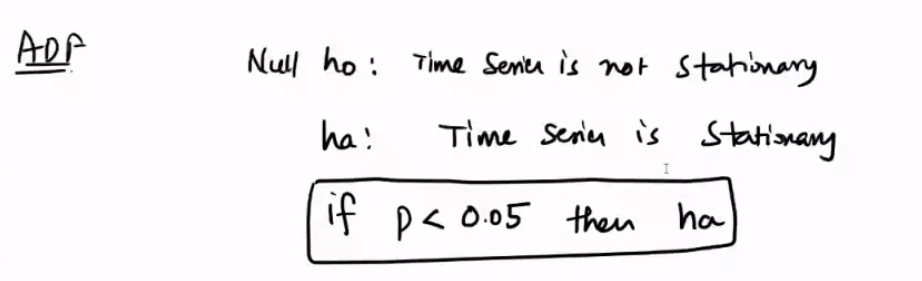

Null hypothesis is always coservative.

In [66]:
# Creating a function to do the adf test
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1] 
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

adf_test(mobile_sales.Sales)

Sequence is not stationary


In [67]:
# Just for the sake of understanding what a stationary time series is, we're using decomposition, taking the residuals and plotting them.
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')

<Axes: xlabel='DATE'>

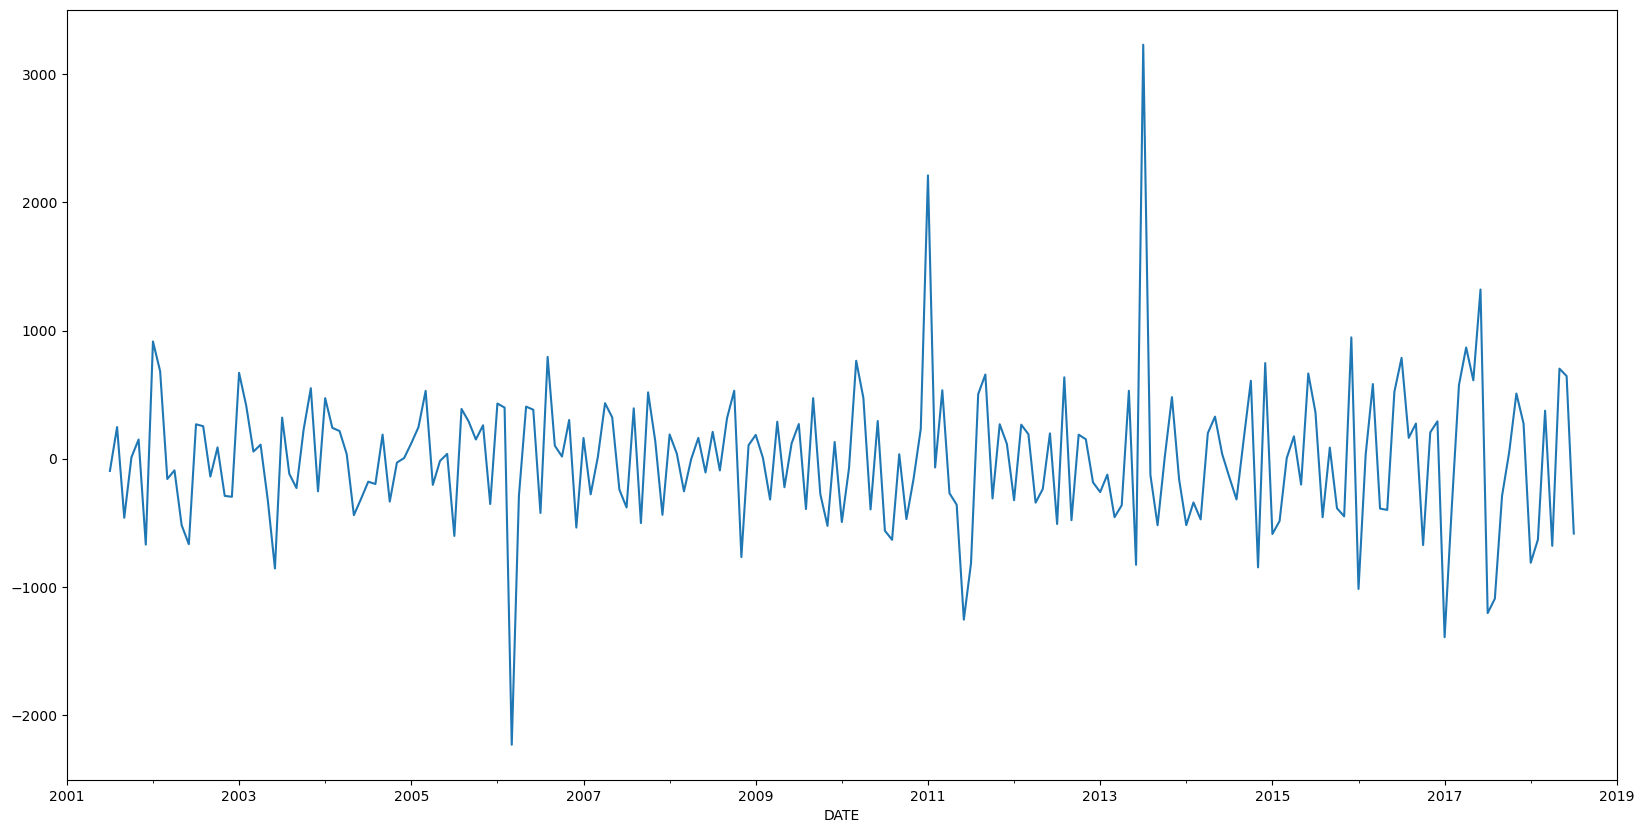

In [68]:
model.resid.plot()

This time series is somewhat stationary.

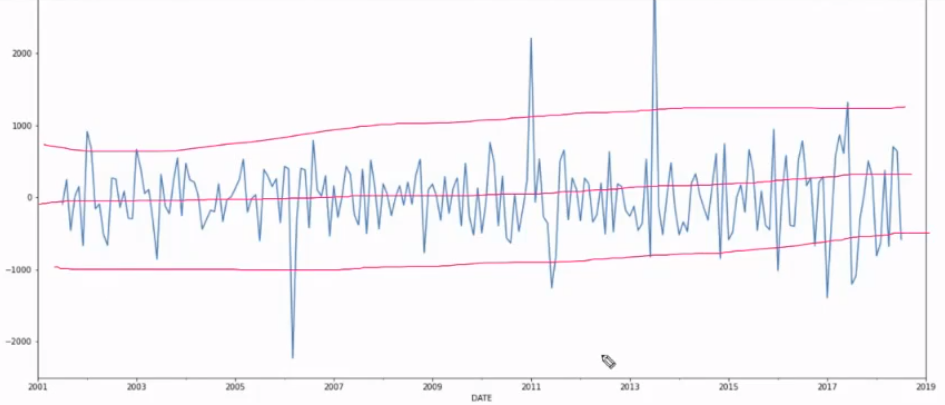

In [69]:
adf_test(model.resid.dropna())  # Since there are some NA's, we're dropping them.

Sequence is stationary


In [70]:
sm.tsa.stattools.adfuller(model.resid.dropna())[1]

3.7134101382157896e-08

P Value is < .05, stationary.

##### Check if below are stationary time series or not?

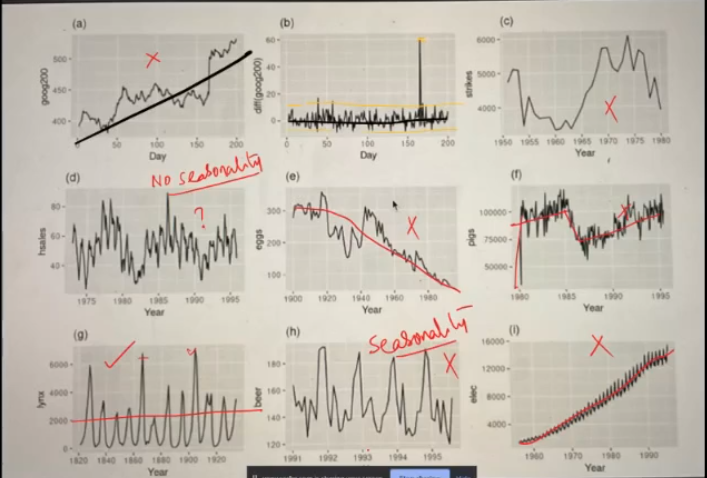

If trend and seasonality is there, we go with Holt and Winters Exponential Smoothing, otherwise we'll see more models in next class.

If you have any questions, get in touch with me [**here**](https://linktr.ee/khushalkumar31)